# Bayesian Modeling with RJAGS

In [36]:
library(rjags)
library(ggplot2)
library(ggridges)

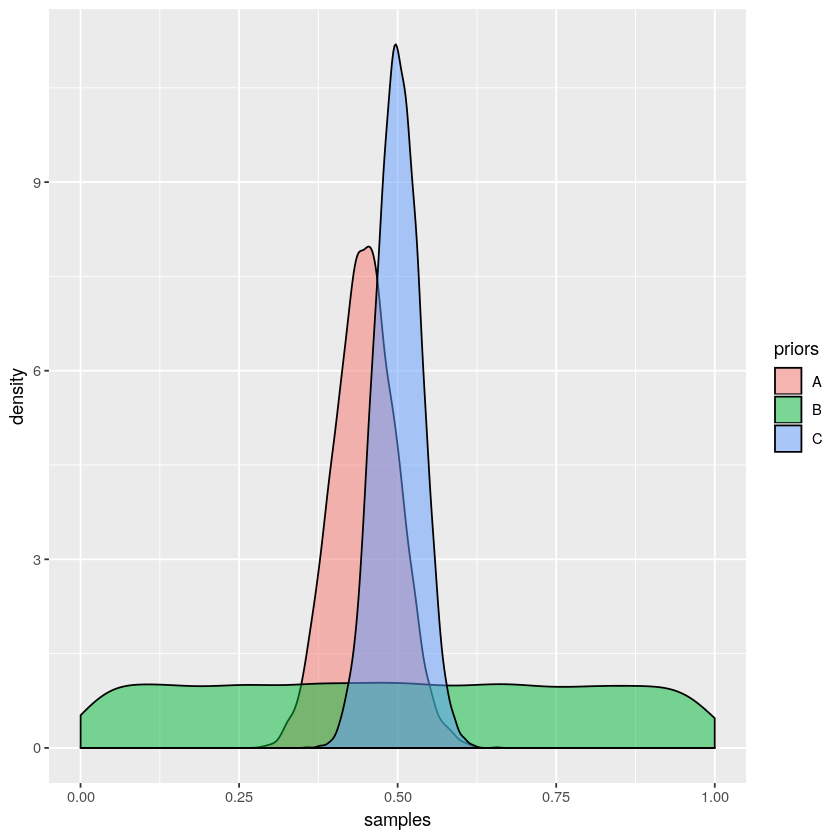

In [3]:
# Sample 10000 draws from Beta(45,55) prior
prior_A <- rbeta(n = 10000, shape1 = 45, shape2 = 55)

# Sample 10000 draws from the Beta(1,1) prior
prior_B <- rbeta(n = 10000, shape1 = 1, shape2 = 1)    

# Sample 10000 draws from the Beta(100,100) prior
prior_C <- rbeta(n = 10000, shape1 = 100, shape2 = 100)

# Combine the results in a single data frame
prior_sim <- data.frame(samples = c(prior_A, prior_B, prior_C),
        priors = rep(c("A","B","C"), each = 10000))

# Plot the 3 priors
ggplot(prior_sim, aes(x = samples, fill = priors)) + 
    geom_density(alpha = 0.5)

The likelihood function summarizes the likelihood of observing polling data  X under different values of the underlying support parameter  p. 

Picking joint bandwidth of 0.0406


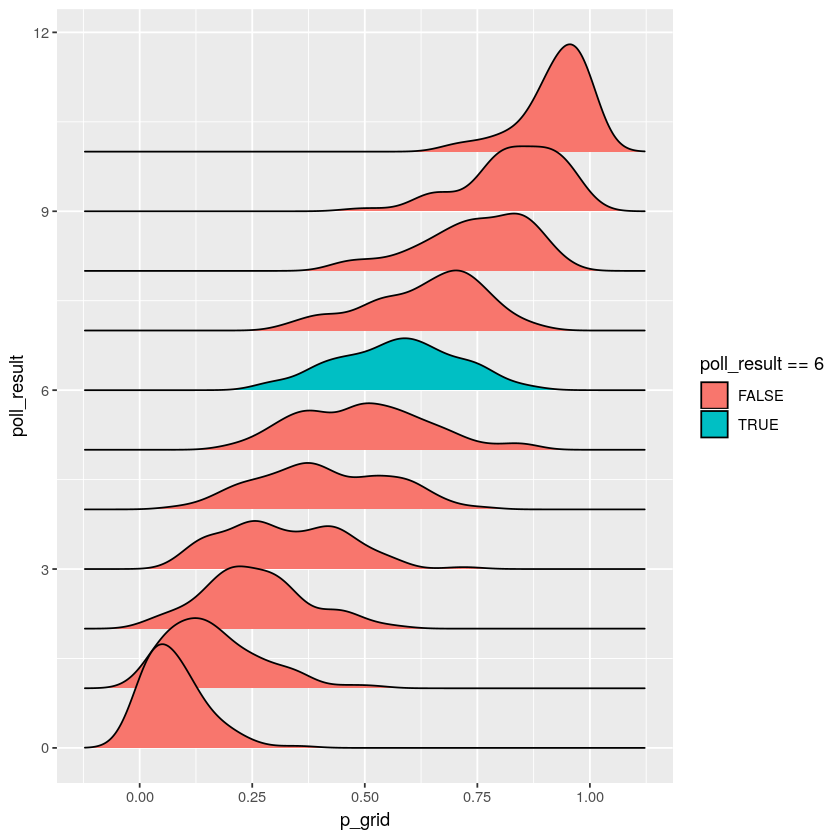

In [17]:
# Define a vector of 1000 p values    
p_grid <- seq(from = 0, to = 1, length.out = 1000)

# Simulate 1 poll result for each p in p_grid   
poll_result <- rbinom(1000,10, p_grid)


# Create likelihood_sim data frame
likelihood_sim <- data.frame(p_grid, poll_result) 


# Density plots of p_grid grouped by poll_result
ggplot(likelihood_sim, aes(x = p_grid, y = poll_result, group = poll_result, fill =  poll_result == 6)) +   geom_density_ridges()

In [16]:
poll_result[490:500]

[1] 8 5 6 6 7 4 3 5 7 3 6

In [25]:
# DEFINE the model
vote_model <- "model{
    # Likelihood model for X
    X ~ dbin(p, n)

    # Prior model for p
    p ~ dbeta(a, b)
}"

vote_model

[1] "model{\n    # Likelihood model for X\n    X ~ dbin(p, n)\n\n    # Prior model for p\n    p ~ dbeta(a, b)\n}"

In [28]:
# COMPILE the model    
vote_jags <- jags.model(textConnection(vote_model), 
    data = list(a = 45, b = 55, X = 6, n = 10),
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 100))

vote_jags

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



JAGS model:

model{
    # Likelihood model for X
    X ~ dbin(p, n)

    # Prior model for p
    p ~ dbeta(a, b)
}
Fully observed variables:
 X a b n 

In [30]:
# SIMULATE the posterior
vote_sim <- coda.samples(model = vote_jags, 
    variable.names = c("p"), 
    n.iter = 10000)

vote_sim

[[1]]
Markov Chain Monte Carlo (MCMC) output:
Start = 11001 
End = 21000 
Thinning interval = 1 
                 p
    [1,] 0.4190833
    [2,] 0.3954243
    [3,] 0.5336241
    [4,] 0.4146222
    [5,] 0.4256639
    [6,] 0.4347400
    [7,] 0.4196599
    [8,] 0.4555933
    [9,] 0.4479310
   [10,] 0.4446941
   [11,] 0.4665081
   [12,] 0.5205057
   [13,] 0.4155795
   [14,] 0.4119743
   [15,] 0.4136306
   [16,] 0.5232414
   [17,] 0.5169666
   [18,] 0.5011381
   [19,] 0.4320047
   [20,] 0.4366411
   [21,] 0.5186427
   [22,] 0.4520487
   [23,] 0.3925877
   [24,] 0.5589351
   [25,] 0.3615959
   [26,] 0.4577555
   [27,] 0.4683714
   [28,] 0.4806580
   [29,] 0.5217497
   [30,] 0.4479935
   [31,] 0.5116610
   [32,] 0.4641193
   [33,] 0.4718672
   [34,] 0.4799065
   [35,] 0.4882003
   [36,] 0.4458908
   [37,] 0.5112142
   [38,] 0.5062049
   [39,] 0.5116743
   [40,] 0.4570984
   [41,] 0.4680704
   [42,] 0.5388444
   [43,] 0.4940058
   [44,] 0.5163427
   [45,] 0.4170376
   [46,] 0.4368369
   [47,] 0

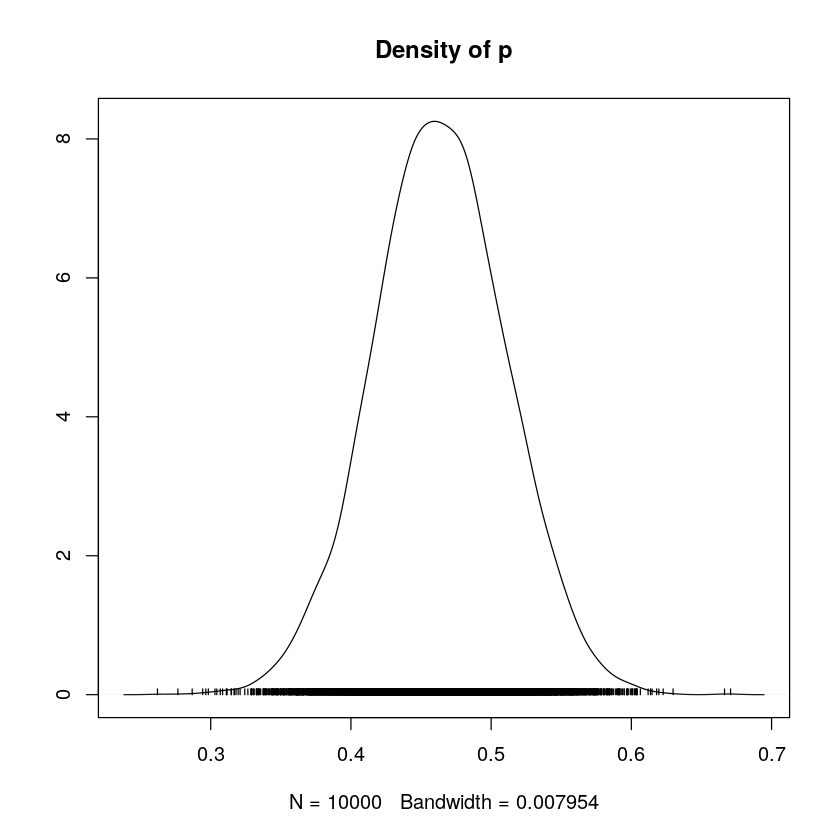

In [31]:
# PLOT the simulated posterior
plot(vote_sim, trace = FALSE)

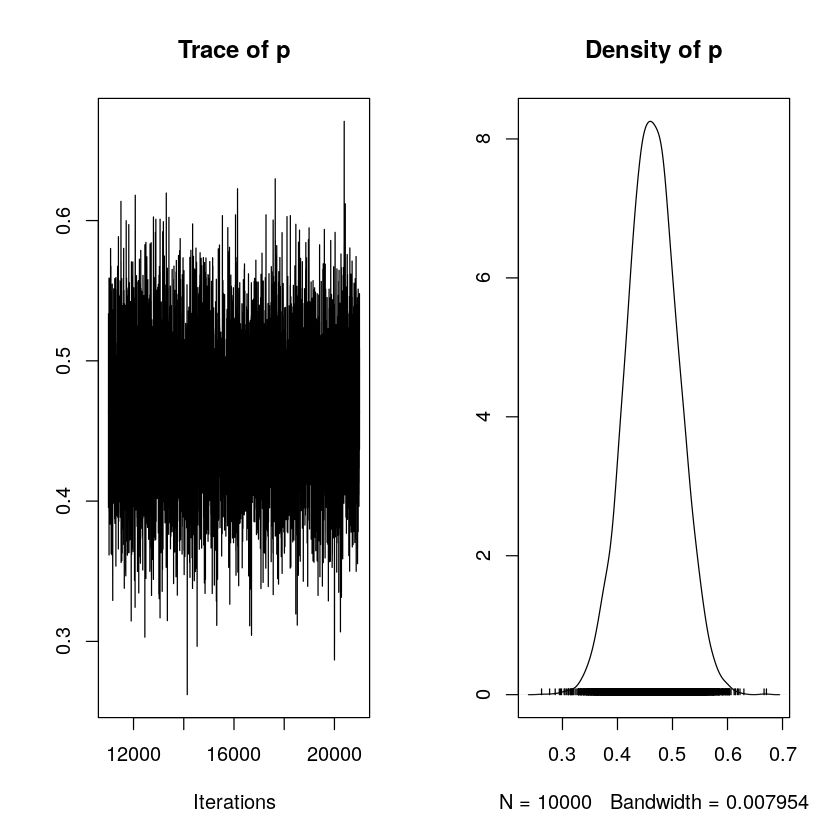

In [32]:
# PLOT the simulated posterior
plot(vote_sim)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



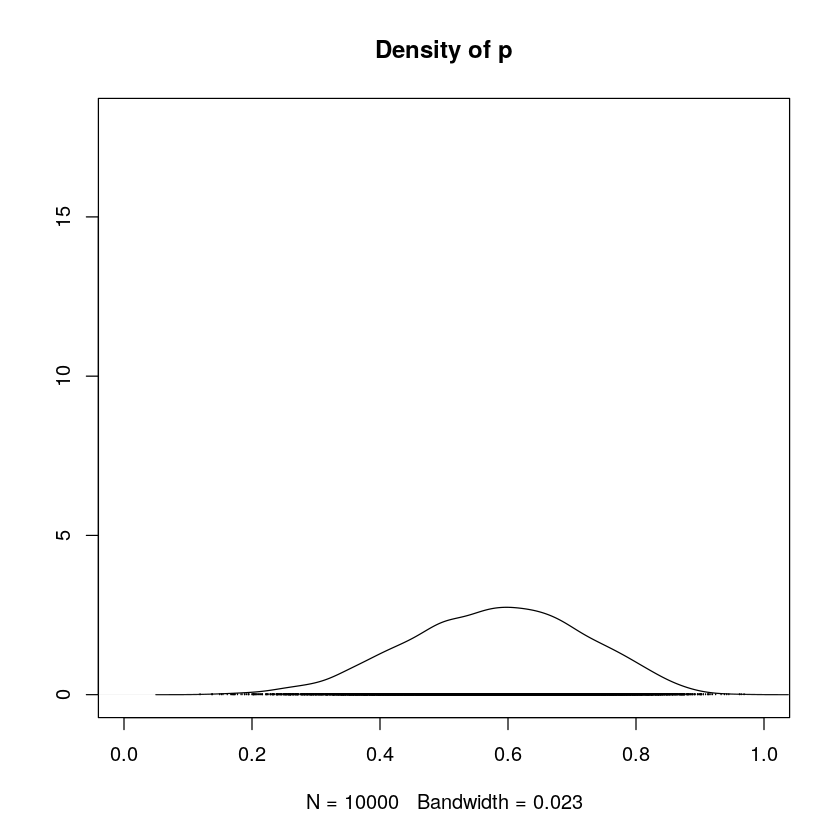

In [33]:
# COMPILE the model    
vote_jags <- jags.model(textConnection(vote_model), 
    data = list(a = 1, b = 1, X = 6, n = 10),
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 100))

# SIMULATE the posterior
vote_sim <- coda.samples(model = vote_jags, variable.names = c("p"), n.iter = 10000)

# PLOT the posterior
plot(vote_sim, trace = FALSE, xlim = c(0,1), ylim = c(0,18))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



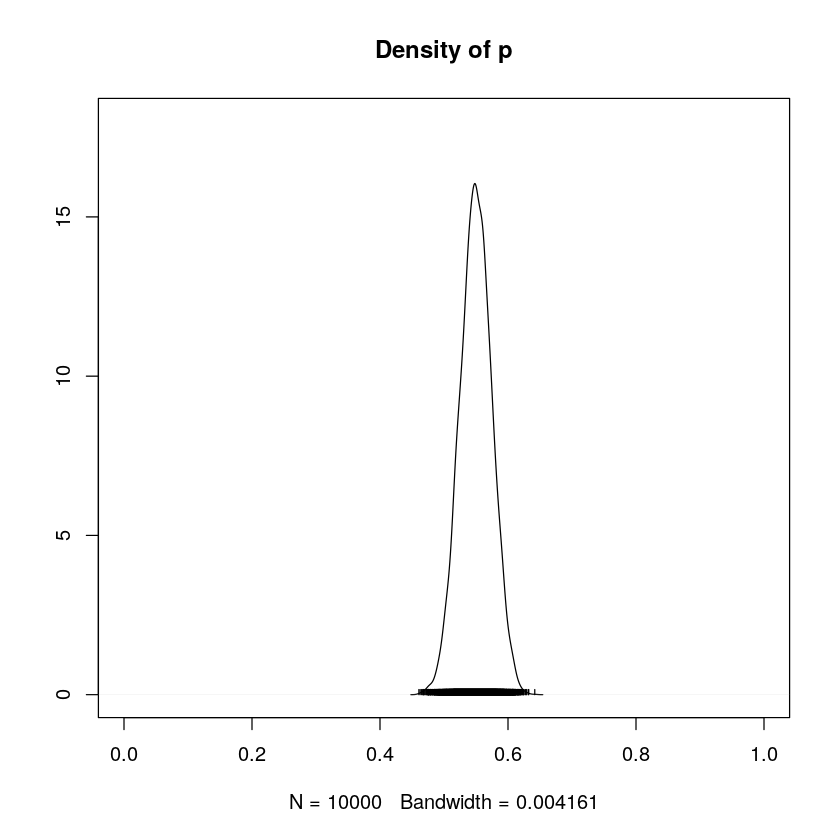

In [34]:
# COMPILE the model    
vote_jags <- jags.model(textConnection(vote_model), 
    data = list(a = 1, b = 1, X = 220, n = 400),
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 100))

# SIMULATE the posterior
vote_sim <- coda.samples(model = vote_jags, variable.names = c("p"), n.iter = 10000)

# PLOT the posterior
plot(vote_sim, trace = FALSE, xlim = c(0,1), ylim = c(0,18))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model



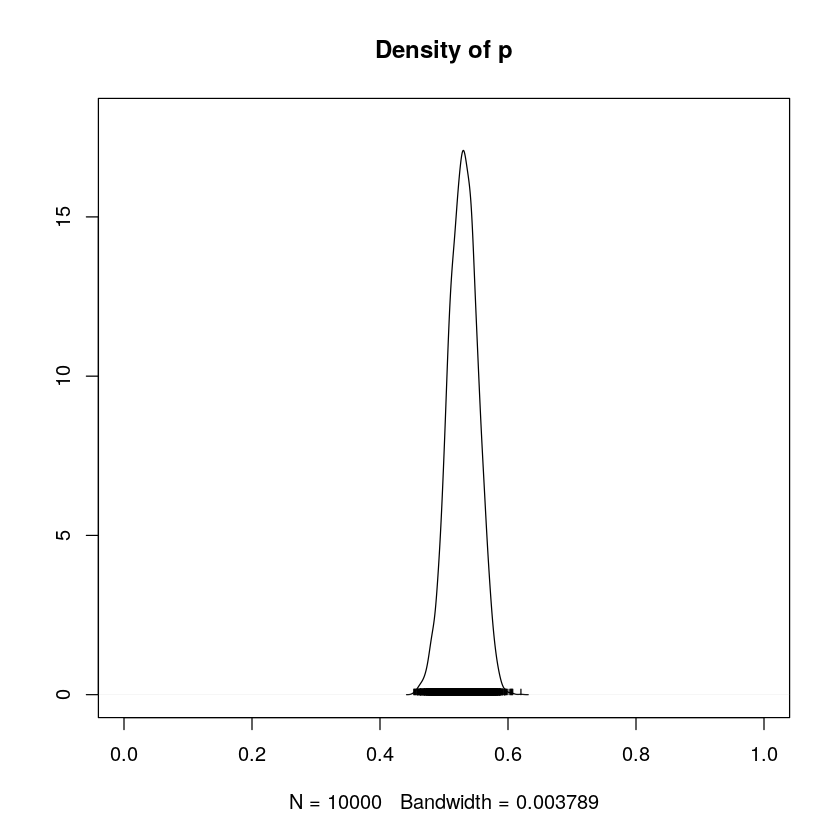

In [35]:
# COMPILE the model    
vote_jags <- jags.model(textConnection(vote_model), 
    data = list(a = 45, b = 55, X = 220, n = 400),
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 100))

# SIMULATE the posterior
vote_sim <- coda.samples(model = vote_jags, variable.names = c("p"), n.iter = 10000)

# PLOT the posterior
plot(vote_sim, trace = FALSE, xlim = c(0,1), ylim = c(0,18))

- Even in light of the same data, different priors lead to different posteriors.
- The influence of the prior on the posterior diminishes as the sample size of your data increases.
- As sample size increases, your posterior understanding becomes more precise.


## Normal-Normal Model

Likelihood: $Y_i \sim N(m, s^2)$

Priors: $m \sim N(50, 25^2); s \sim Unif(0, 200)$

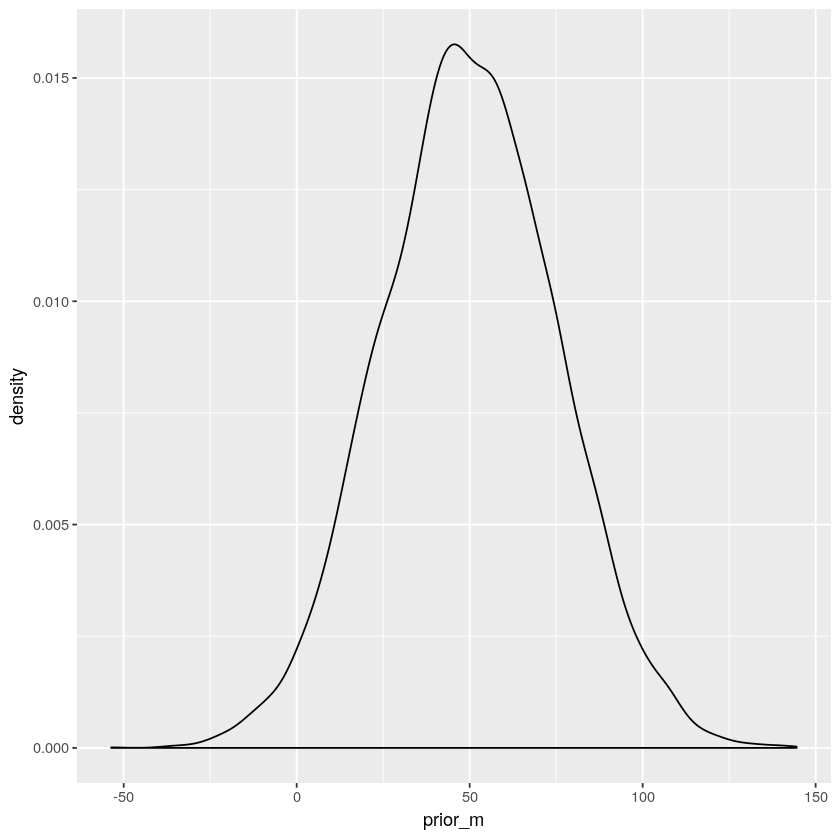

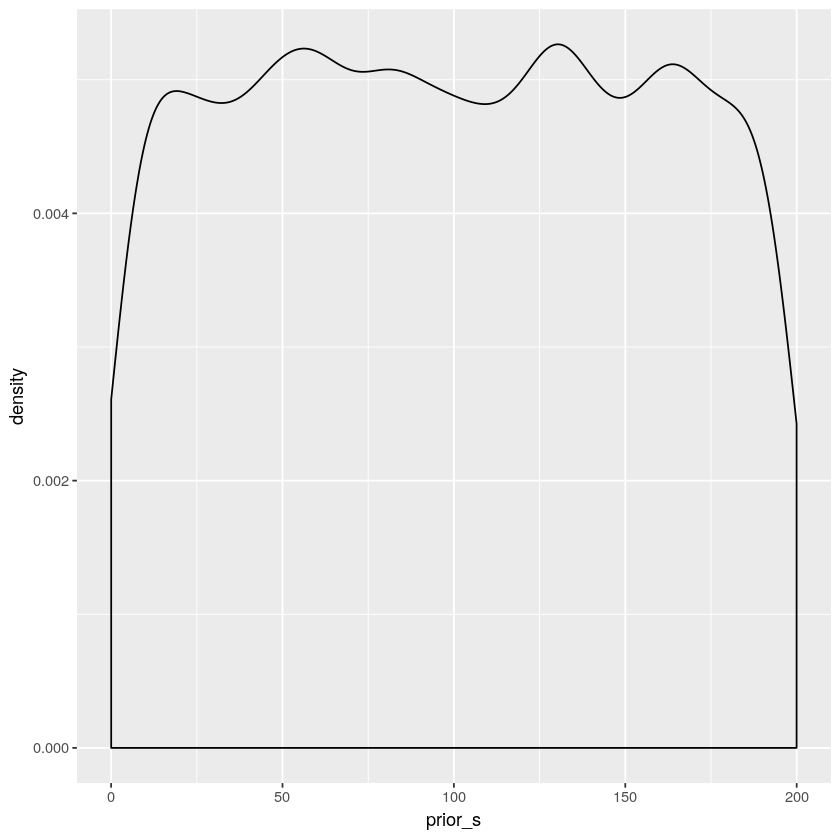

In [42]:
# Take 10000 samples from the m prior
prior_m <- rnorm(10000, 50, 25)

# Take 10000 samples from the s prior    
prior_s <- runif(10000, 0, 200)

# Store samples in a data frame
samples <- data.frame(prior_m, prior_s)

# Density plots of the prior_m & prior_s samples    
ggplot(samples, aes(x = prior_m)) + 
    geom_density()
ggplot(samples, aes(x = prior_s)) + 
    geom_density()

In [76]:
library(tidyr)
library(dplyr)

In [79]:
sleep_study = read.csv('https://assets.datacamp.com/production/repositories/2096/datasets/62737a3d23519405d7bfe3eceb85be0f97a07862/sleep_study.csv')

In [80]:
sleep_study = sleep_study %>% mutate(diff_3 =  day_3 - day_0)
sleep_study %>% head(6)

subject day_0    day_3    diff_3  
1 308     249.5600 321.4398  71.8798
2 309     222.7339 204.7070 -18.0269
3 310     199.0539 232.8416  33.7877
4 330     321.5426 285.1330 -36.4096
5 331     287.6079 320.1153  32.5074
6 332     234.8606 309.7688  74.9082

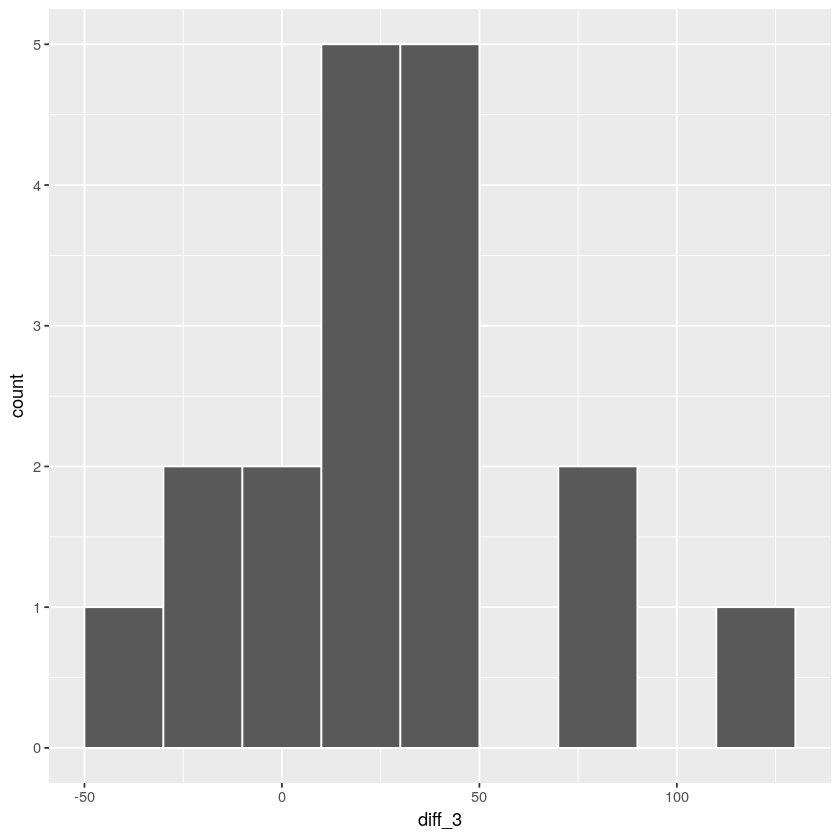

In [81]:
# Histogram of diff_3    
ggplot(sleep_study, aes(x = diff_3)) + 
    geom_histogram(binwidth = 20, color = "white")


In [82]:
# Mean and standard deviation of diff_3
sleep_study  %>% 
    summarize(mean(diff_3), sd(diff_3))

mean(diff_3) sd(diff_3)
1 26.34021     37.20764

NOTE: $precision = variance^{-1} = s^{-2}$ 

In [83]:
sleep_model <- "model{
    # Likelihood model for Y[i]
    for(i in 1:length(Y)) {
        Y[i] ~ dnorm(m, s^(-2))
    }

    # Prior models for m and s
    m ~ dnorm(50, 25^(-2))
    s ~ dunif(0, 200)
}"

In [84]:
# COMPILE the model    
sleep_jags <- jags.model(textConnection(sleep_model), 
    data = list(Y = sleep_study$diff_3), 
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 1989))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 18
   Unobserved stochastic nodes: 2
   Total graph size: 28

Initializing model



In [85]:
# SIMULATE the posterior
sleep_sim <- coda.samples(model = sleep_jags, 
    variable.names = c("m", "s"), 
    n.iter = 10000)

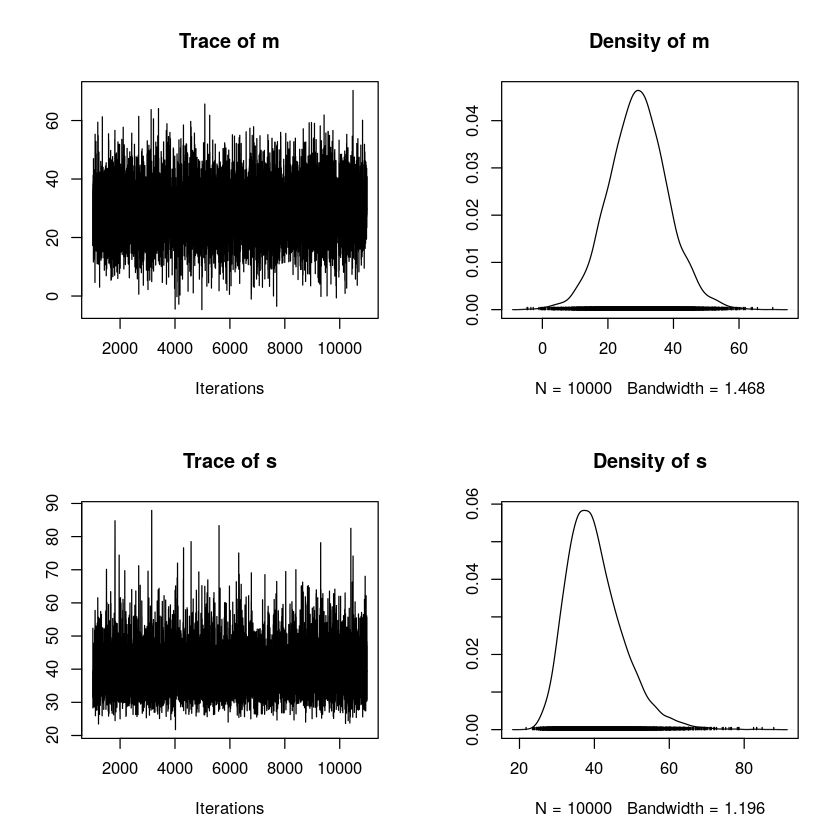

In [86]:
plot(sleep_sim)

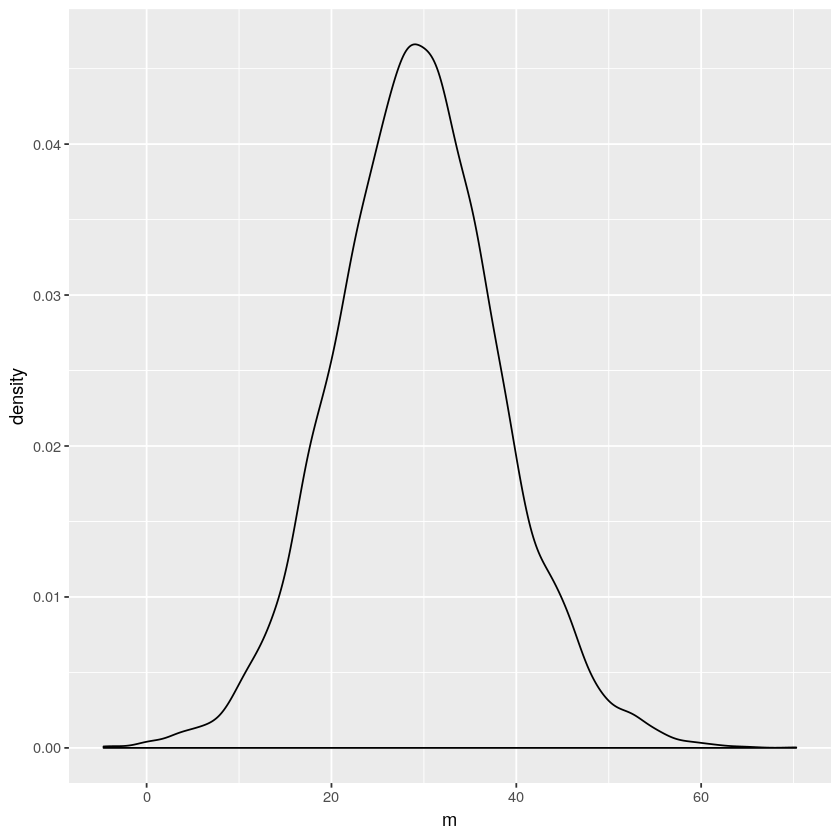

In [98]:
# Use ggplot() to construct a density plot of the m chain
ggplot(sleep_chains, aes(x = m)) + 
    geom_density()

## Markov Chains

- RJAGS goal: Utilize Markov chains to approximate posteriors that are otherwise too complicated to define or sample
- m is a Markov chain, NOT a random sample from the posterior; it traverses the sample space of m, mimics a random sample, and converges to the posterior
- as number of iterations grow, trace plot grows longer, density plot gets closer to normal distribution

In [94]:
head(sleep_sim[[1]][1:10000, 1:2])

m        s       
[1,] 17.25796 31.46256
[2,] 34.58469 37.88655
[3,] 36.45480 39.58056
[4,] 25.00971 39.69494
[5,] 29.95475 35.90001
[6,] 28.43894 37.46466

In [95]:
sleep_chains <- data.frame(sleep_sim[[1]][1:10000, 1:2], iter = seq(1,10000,1))
head(sleep_chains, 6)

m        s        iter
1 17.25796 31.46256 1   
2 34.58469 37.88655 2   
3 36.45480 39.58056 3   
4 25.00971 39.69494 4   
5 29.95475 35.90001 5   
6 28.43894 37.46466 6

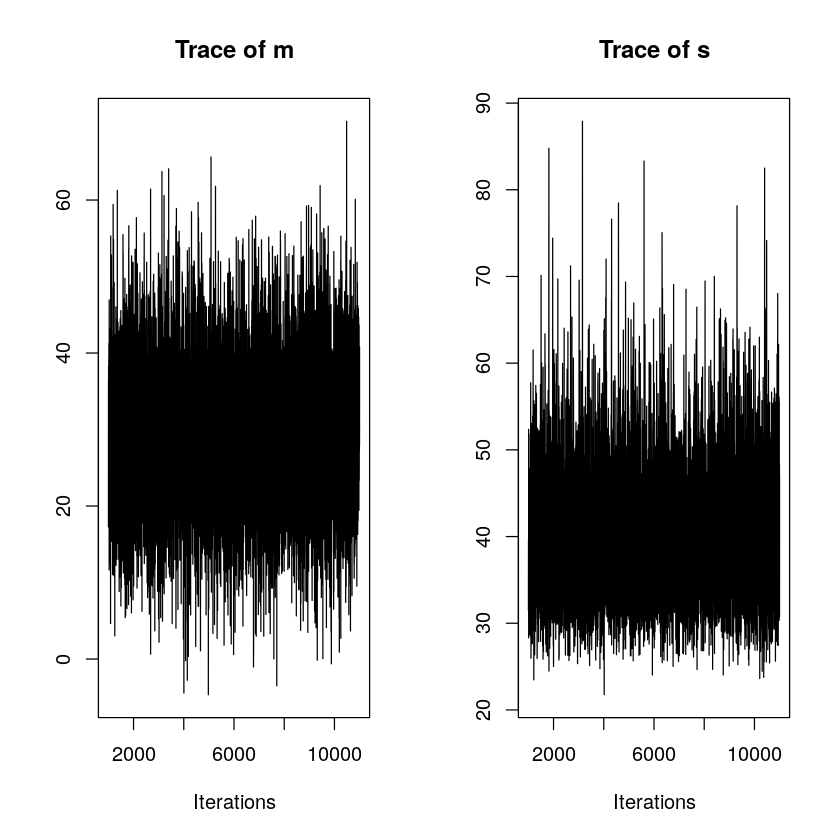

In [96]:
plot(sleep_sim, density = FALSE)

NOTE: The 10,000 recorded Iterations start after a "burn-in" period in which samples are discarded. Thus the Iterations count doesn't start at 1!

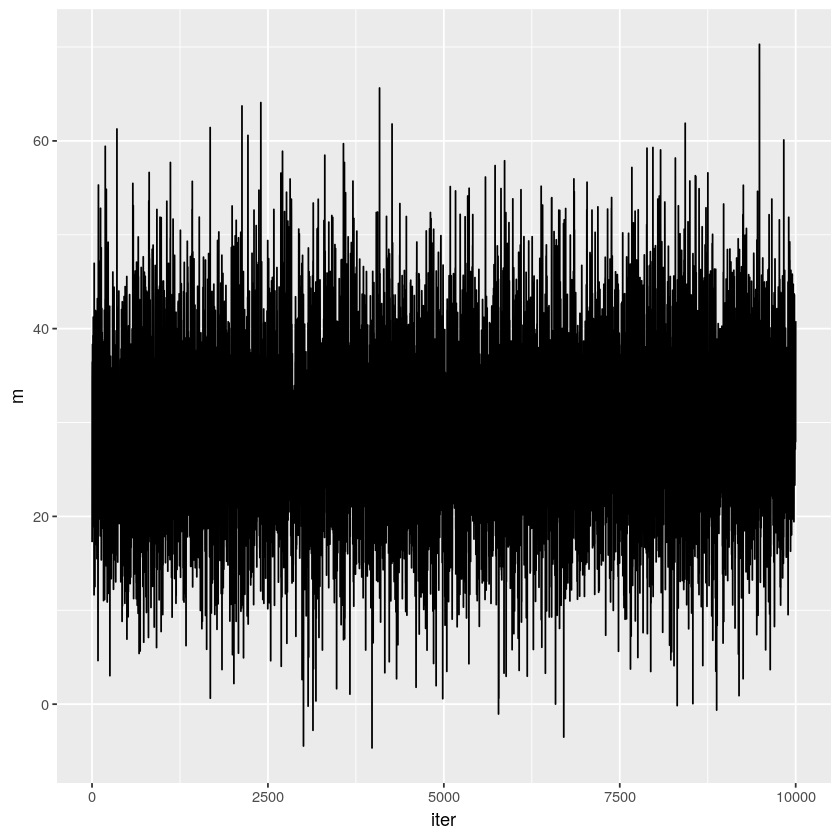

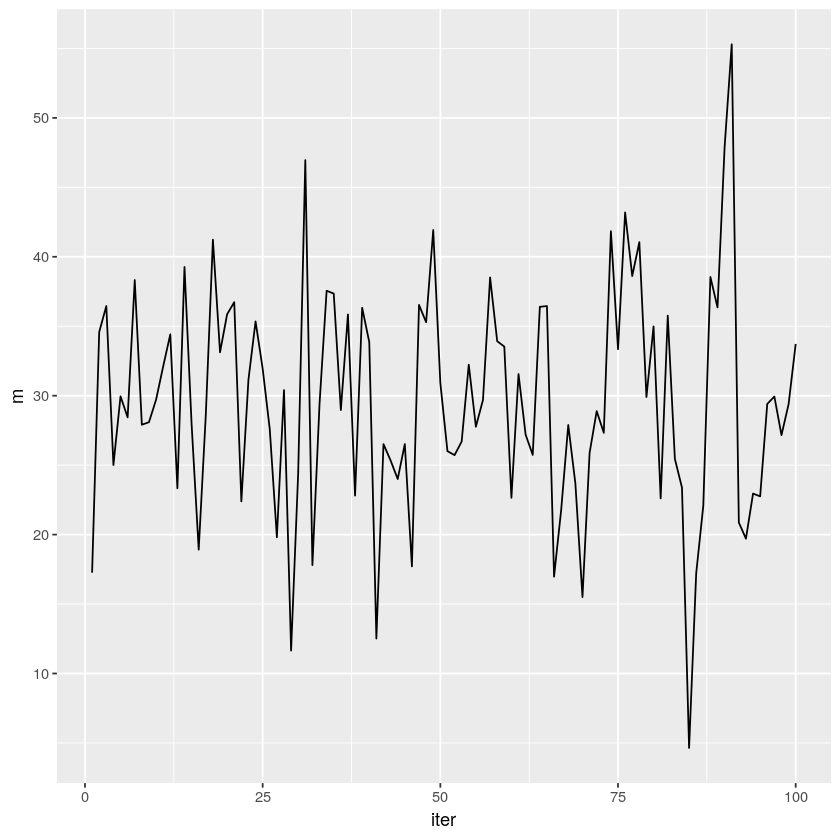

In [97]:
# Use ggplot() to construct a trace plot of the m chain
ggplot(sleep_chains, aes(x = iter, y = m)) + 
    geom_line()

# Trace plot the first 100 iterations of the m chain
ggplot(sleep_chains[1:100,], aes(x = iter, y = m)) + 
    geom_line()

Diagnostic: 
- trace plots: stable ($E(chain) = const$)
-  multiple chains 
- standart error (summary): $ Naive\ SE = \frac{SD}{\sqrt{\text{number of iterations}}}$ 

Finalizing the Markov chain: 
- Reproducibility (random seed)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 18
   Unobserved stochastic nodes: 2
   Total graph size: 28

Initializing model



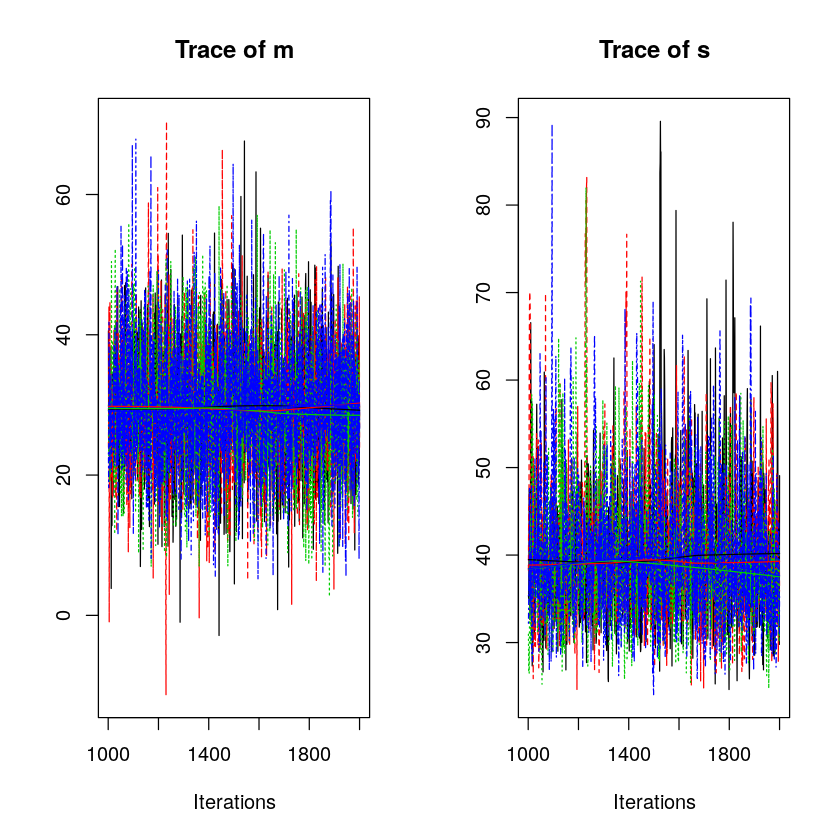

In [112]:
# COMPILE the model
sleep_jags_multi <- jags.model(textConnection(sleep_model), data = list(Y = sleep_study$diff_3), n.chains = 4   )   

# SIMULATE the posterior    
sleep_sim_multi <- coda.samples(model = sleep_jags_multi, variable.names = c("m", "s"), n.iter = 1000)

# Construct trace plots of the m and s chains
plot(sleep_sim_multi, density=FALSE)

In [101]:
# SIMULATE the posterior    
sleep_sim_1 <- coda.samples(model = sleep_jags, variable.names = c("m", "s"), n.iter = 1000)

# Summarize the m and s chains of sleep_sim_1
summary(sleep_sim_1)

# RE-SIMULATE the posterior    
sleep_sim_2 <- coda.samples(model = sleep_jags, variable.names = c("m", "s"), n.iter = 10000)


# Summarize the m and s chains of sleep_sim_2
summary(sleep_sim_2)


Iterations = 11001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean    SD Naive SE Time-series SE
m 29.55 9.032   0.2856         0.2856
s 40.81 7.654   0.2420         0.3414

2. Quantiles for each variable:

   2.5%   25%   50%   75% 97.5%
m 12.00 23.62 29.31 35.58 47.48
s 28.34 35.25 39.97 45.41 58.60



Iterations = 12001:22000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean    SD Naive SE Time-series SE
m 29.33 9.080  0.09080         0.0942
s 40.12 7.483  0.07483         0.1115

2. Quantiles for each variable:

   2.5%   25%   50%   75% 97.5%
m 11.69 23.25 29.25 35.24 47.55
s 28.61 34.89 39.07 44.25 57.82


In [104]:
# COMPILE the model
sleep_jags <- jags.model(textConnection(sleep_model), data = list(Y = sleep_study$diff_3)) 

# SIMULATE the posterior    
sleep_sim <- coda.samples(model = sleep_jags, variable.names = c("m", "s"), n.iter = 10000)

# Summarize the m and s chains of sleep_sim
summary(sleep_sim)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 18
   Unobserved stochastic nodes: 2
   Total graph size: 28

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean    SD Naive SE Time-series SE
m 29.47 9.023  0.09023        0.09468
s 40.35 7.786  0.07786        0.12468

2. Quantiles for each variable:

   2.5%   25%   50%   75% 97.5%
m 12.15 23.55 29.27 35.31 47.86
s 28.55 34.85 39.23 44.52 58.39


In [105]:
# COMPILE the model
sleep_jags <- jags.model(textConnection(sleep_model), data = list(Y = sleep_study$diff_3) ,
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 1989) ) 

# SIMULATE the posterior    
sleep_sim <- coda.samples(model = sleep_jags, variable.names = c("m", "s"), n.iter = 10000)

# Summarize the m and s chains of sleep_sim
summary(sleep_sim)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 18
   Unobserved stochastic nodes: 2
   Total graph size: 28

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean    SD Naive SE Time-series SE
m 29.29 8.980  0.08980        0.08854
s 40.19 7.519  0.07519        0.11557

2. Quantiles for each variable:

   2.5%   25%   50%   75% 97.5%
m 11.78 23.34 29.16 35.05 47.45
s 28.68 34.85 39.12 44.39 57.79


## Bayesian Inference & Prediction

- $ Y_i \sim N(m_i, s^2) $
- $m_i = a + b X_i$
- $a \sim N(0, 200^2)$
- $b \sim N(1, 0.5^2)$
- $s \sim Unif(0, 20)$

In [113]:
# Take 10000 samples from the a, b, & s priors
a <- rnorm(10000, 0, 200)
b <- rnorm(10000, 1, 0.5)
s <- runif(10000, 0, 20)

# Store samples in a data frame
samples <- data.frame(set = 1:10000, a, b, s)

In [117]:
prior_scenarios_rep <- bind_rows(replicate(n = 50, expr = samples[1:12, ], simplify = FALSE)) 
dim(prior_scenarios_rep)

[1] 600   4

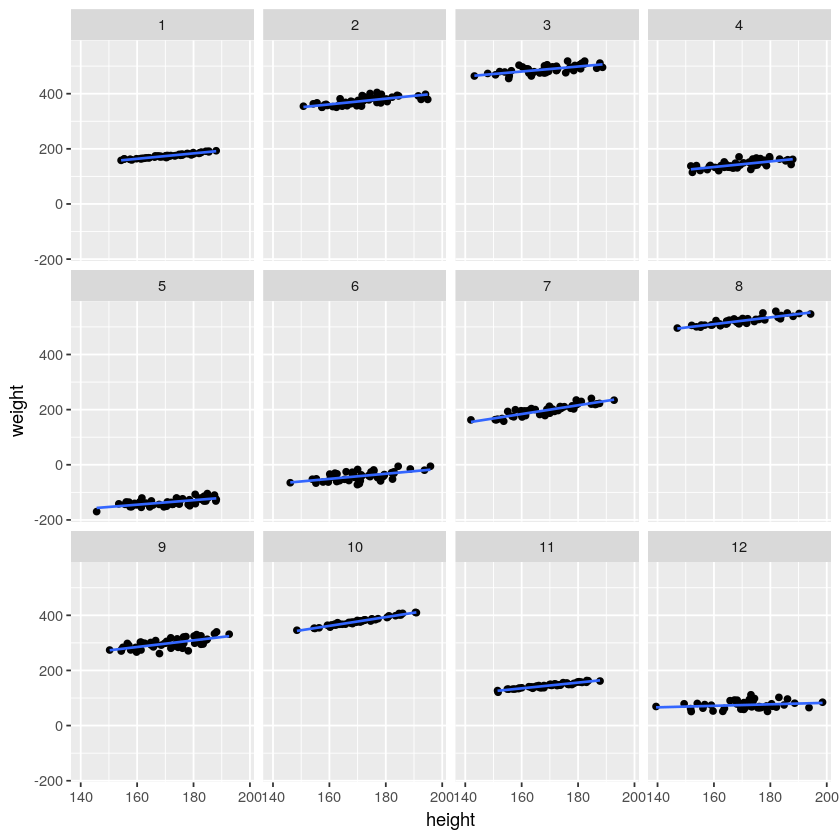

In [118]:
# Simulate 50 height & weight data points for each parameter set
prior_simulation <- prior_scenarios_rep %>% 
    mutate(height = rnorm(n = 600, mean = 170, sd = 10)) %>% 
    mutate(weight = rnorm(n = 600, mean = prior_scenarios_rep$a+prior_scenarios_rep$b*height, sd = prior_scenarios_rep$s))

# Plot the simulated data & regression model for each parameter set
ggplot(prior_simulation, aes(x = height, y = weight)) + 
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE, size = 0.75) + 
    facet_wrap(~ set)

These 12 plots demonstrate the range of prior plausible models. These models have different intercepts, slopes, and residual standard deviations. Almost all of the models have positive slopes, demonstrating the prior information that there is likely a positive association between weight & height.

In [121]:
library(openintro)

In [123]:
head(bdims)

bia.di bii.di bit.di che.de che.di elb.di wri.di kne.di ank.di sho.gi ⋯
1 42.9   26.0   31.5   17.7   28.0   13.1   10.4   18.8   14.1   106.2  ⋯
2 43.7   28.5   33.5   16.9   30.8   14.0   11.8   20.6   15.1   110.5  ⋯
3 40.1   28.2   33.3   20.9   31.7   13.9   10.9   19.7   14.1   115.1  ⋯
4 44.3   29.9   34.0   18.4   28.2   13.9   11.2   20.9   15.0   104.5  ⋯
5 42.5   29.9   34.0   21.5   29.4   15.2   11.6   20.7   14.9   107.5  ⋯
6 43.3   27.0   31.5   19.6   31.3   14.0   11.5   18.8   13.9   119.8  ⋯
  bic.gi for.gi kne.gi cal.gi ank.gi wri.gi age wgt  hgt   sex
1 32.5   26.0   34.5   36.5   23.5   16.5   21  65.6 174.0 1  
2 34.4   28.0   36.5   37.5   24.5   17.0   23  71.8 175.3 1  
3 33.4   28.8   37.0   37.3   21.9   16.9   28  80.7 193.5 1  
4 31.0   26.2   37.0   34.8   23.0   16.6   23  72.6 186.5 1  
5 32.0   28.4   37.7   38.6   24.4   18.0   22  78.8 187.2 1  
6 33.0   28.0   36.6   36.1   23.5   16.9   21  74.8 181.5 1

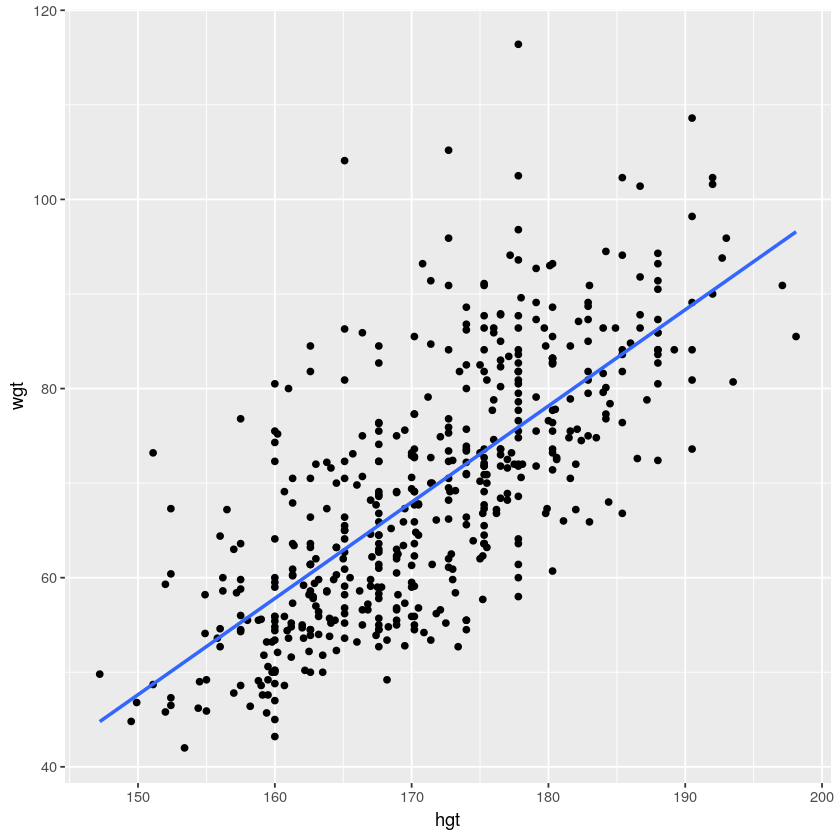

In [125]:
# Add a model smooth
ggplot(bdims, aes(x = hgt, y = wgt)) + 
    geom_point() + 
    geom_smooth(method = "lm", se = FALSE)

In [126]:
wt_mod <- lm(wgt ~ hgt, bdims)

coef(wt_mod)
summary(wt_mod)$sigma

(Intercept)         hgt 
-105.011254    1.017617

[1] 9.30804

In [128]:
weight_model <- "model{
    # Likelihood model for Y[i]
    for(i in 1:length(Y)) {
      Y[i] ~ dnorm(m[i], s^(-2))
      m[i] <- a + b * X[i]
    }

    # Prior models for a, b, s
    a ~ dnorm(0, 200^(-2))
    b ~ dnorm(1, 0.5^(-2))
    s ~ dunif(0, 20)

}"

In [129]:
# COMPILE the model    
weight_jags <- jags.model(textConnection(weight_model), 
    data = list(X = bdims$hgt, Y = bdims$wgt),
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 2018))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 507
   Unobserved stochastic nodes: 3
   Total graph size: 1321

Initializing model



In [130]:
dim(bdims)
head(bdims$hgt)
head(bdims$wgt)

[1] 507  25

[1] 174.0 175.3 193.5 186.5 187.2 181.5

[1] 65.6 71.8 80.7 72.6 78.8 74.8

In [133]:
# SIMULATE the posterior
weight_sim <- coda.samples(model = weight_jags, 
    variable.names = c("a", "b", "s"), 
    n.iter = 1000)

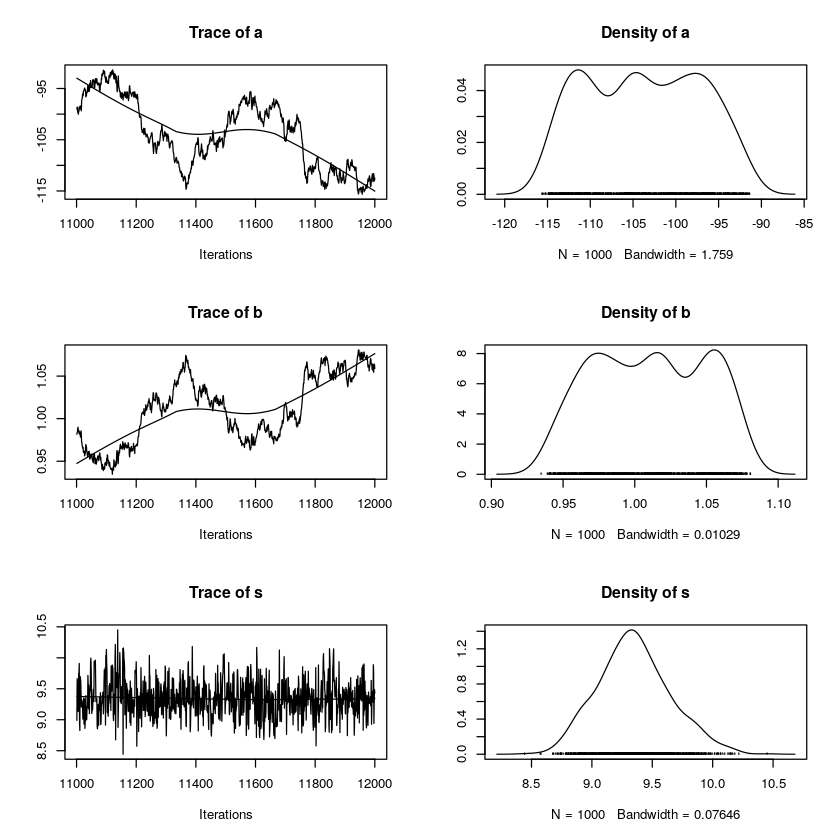

In [134]:
plot(weight_sim)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 507
   Unobserved stochastic nodes: 3
   Total graph size: 1321

Initializing model



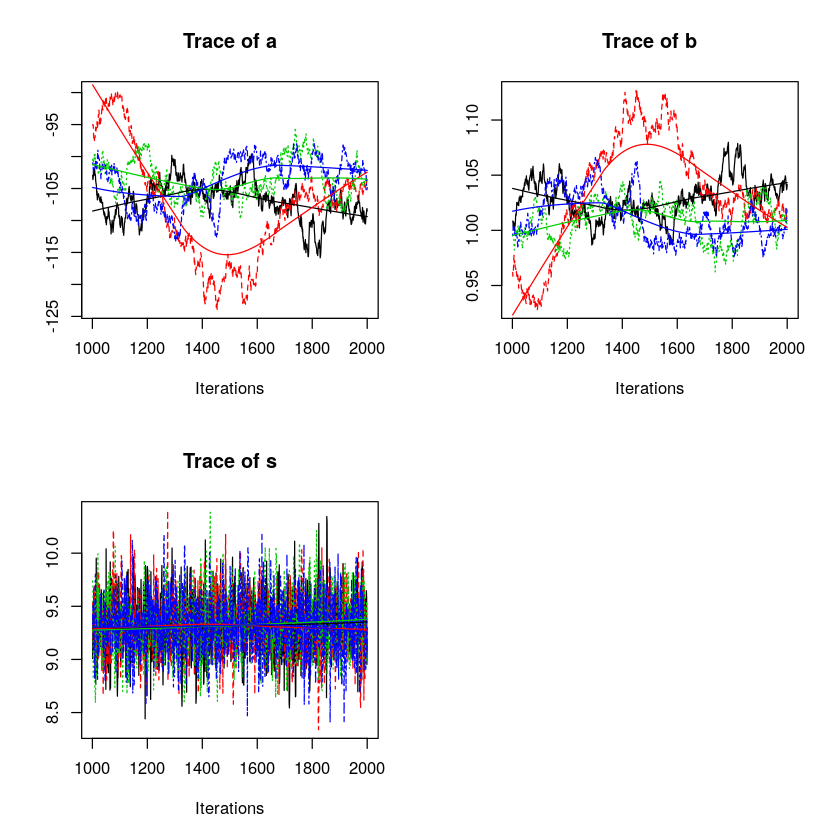

In [141]:
weight_jags <- jags.model(textConnection(weight_model), 
    data = list(X = bdims$hgt, Y = bdims$wgt), n.chains=4)

weight_sim <- coda.samples(model = weight_jags, 
    variable.names = c("a", "b", "s"), 
    n.iter = 1000)

plot(weight_sim, density=FALSE)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 507
   Unobserved stochastic nodes: 3
   Total graph size: 1321

Initializing model



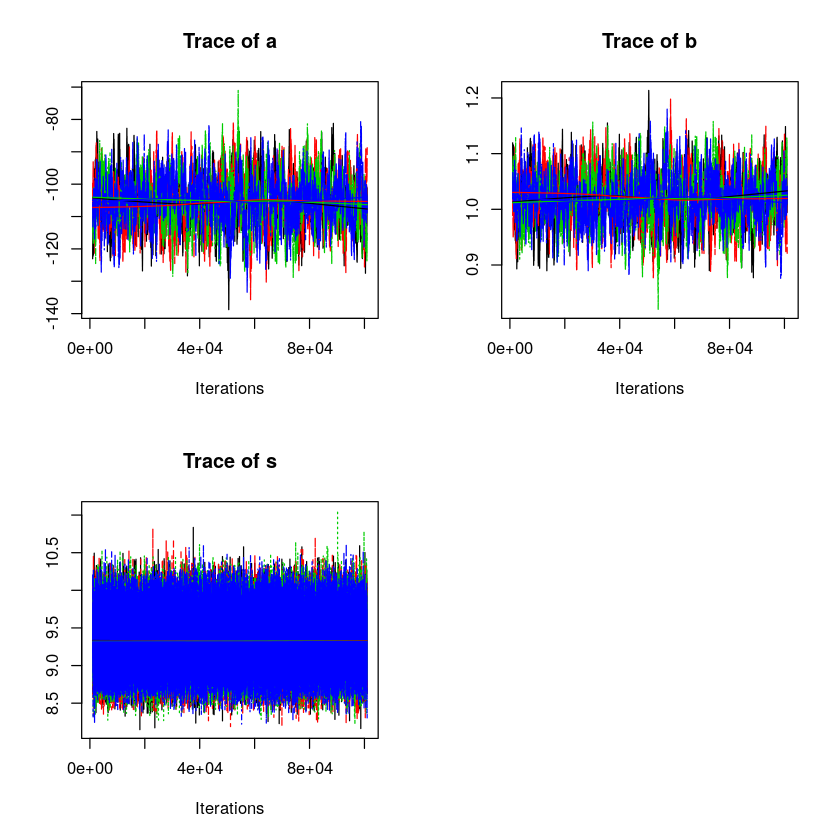

In [142]:
weight_jags <- jags.model(textConnection(weight_model), 
    data = list(X = bdims$hgt, Y = bdims$wgt), n.chains=4)

weight_sim <- coda.samples(model = weight_jags, 
    variable.names = c("a", "b", "s"), 
    n.iter = 100000)

plot(weight_sim, density=FALSE)

In [143]:
summary(weight_sim)


Iterations = 1001:101000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean      SD  Naive SE Time-series SE
a -105.355 7.51866 1.189e-02      0.3027253
b    1.020 0.04387 6.937e-05      0.0017727
s    9.331 0.29449 4.656e-04      0.0006069

2. Quantiles for each variable:

       2.5%       25%      50%      75%   97.5%
a -119.9504 -110.4534 -105.426 -100.429 -90.286
b    0.9316    0.9909    1.020    1.049   1.105
s    8.7746    9.1285    9.324    9.525   9.927


In [148]:
weight_sim[[1]][1:10,]

a         b        s       
 [1,] -123.0442 1.119004 9.277851
 [2,] -122.4519 1.119426 9.684345
 [3,] -122.2645 1.117632 9.735583
 [4,] -122.1055 1.118164 9.712641
 [5,] -121.9503 1.117508 9.454566
 [6,] -121.4398 1.114477 9.486055
 [7,] -121.4404 1.113178 9.232355
 [8,] -121.6751 1.107275 9.378519
 [9,] -120.8956 1.110337 9.437032
[10,] -120.7889 1.110063 9.392331

In [149]:
table(weight_sim[[1]][,2] > 1.1)
mean(weight_sim[[1]][,2] > 1.1)


FALSE  TRUE 
96283  3717 

[1] 0.03717

In [156]:
rand_20 = sample(1:10000, 20)
rand_20

[1] 4246 3052 6735 7001 7981 5922 2857 5113  201 6287 3441 7444 7287  858 5497
[16] 9226 2607 6380  161 1116

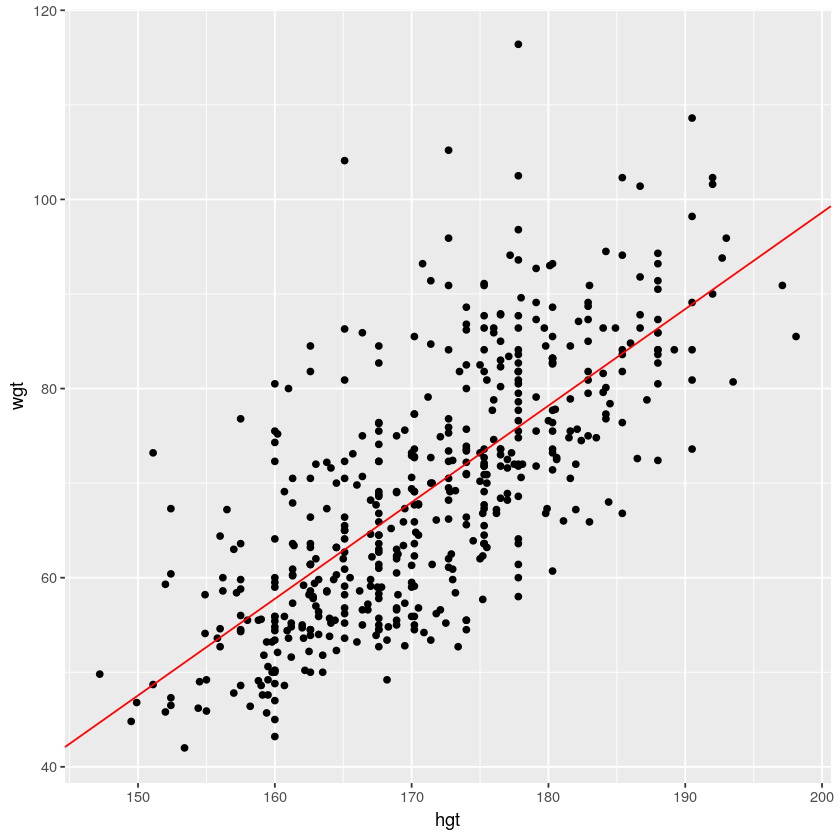

In [181]:
# Plot the posterior mean regression model
ggplot(bdims, aes(x = hgt, y = wgt)) + 
    geom_point() + 
    geom_abline(intercept = mean(weight_sim[[1]][,1]), slope = mean(weight_sim[[1]][,2]), color = "red")

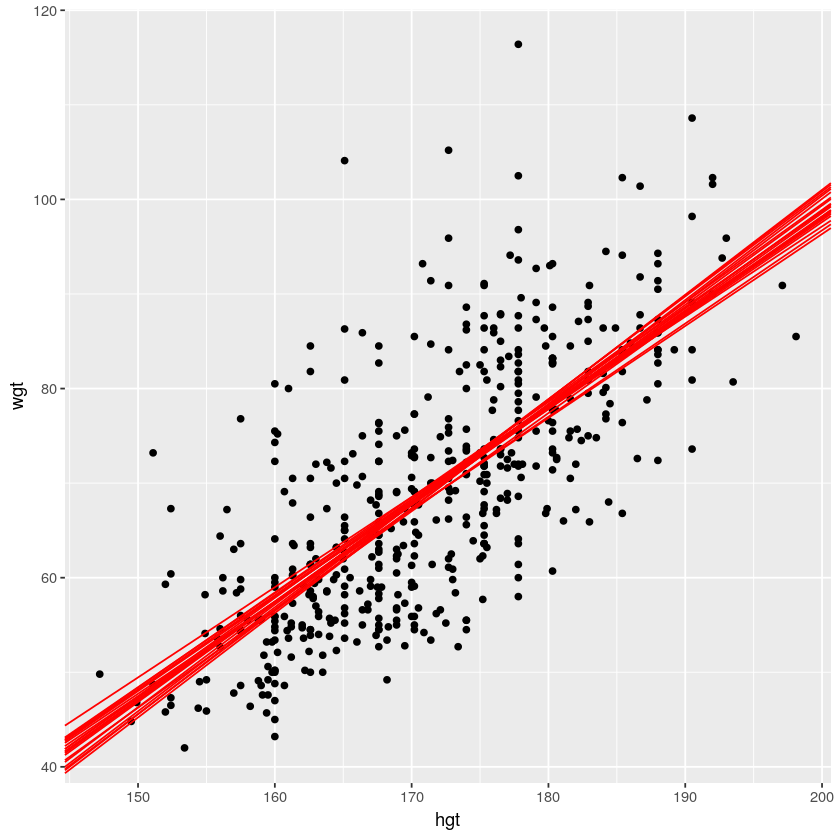

In [159]:
# Plot the posterior mean regression model
ggplot(bdims, aes(x = hgt, y = wgt)) + 
    geom_point() + 
    geom_abline(intercept = weight_sim[[1]][rand_20,1], slope = weight_sim[[1]][rand_20,2], color = "red")

In [163]:
# Summarize the posterior Markov chains
summary(weight_sim)

# Calculate the 95% posterior credible interval for b
ci_95 <- quantile(weight_sim[[1]][,2], c(0.025, 0.975))
ci_95

# Calculate the 90% posterior credible interval for b
ci_90 <- quantile(weight_sim[[1]][,2], c(0.05, 0.95))
ci_90


Iterations = 1001:101000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean      SD  Naive SE Time-series SE
a -105.355 7.51866 1.189e-02      0.3027253
b    1.020 0.04387 6.937e-05      0.0017727
s    9.331 0.29449 4.656e-04      0.0006069

2. Quantiles for each variable:

       2.5%       25%      50%      75%   97.5%
a -119.9504 -110.4534 -105.426 -100.429 -90.286
b    0.9316    0.9909    1.020    1.049   1.105
s    8.7746    9.1285    9.324    9.525   9.927


2.5%     97.5% 
0.9310525 1.1072291

5%      95% 
0.944681 1.093748

In [174]:
weight_sim[[1]][1:10,]

a         b        s       
 [1,] -123.0442 1.119004 9.277851
 [2,] -122.4519 1.119426 9.684345
 [3,] -122.2645 1.117632 9.735583
 [4,] -122.1055 1.118164 9.712641
 [5,] -121.9503 1.117508 9.454566
 [6,] -121.4398 1.114477 9.486055
 [7,] -121.4404 1.113178 9.232355
 [8,] -121.6751 1.107275 9.378519
 [9,] -120.8956 1.110337 9.437032
[10,] -120.7889 1.110063 9.392331

In [172]:
weight_chains = weight_sim[[1]][ , ]
weight_chains =  as.data.frame(weight_chains)
weight_chains %>% head()

a         b        s       
1 -123.0442 1.119004 9.277851
2 -122.4519 1.119426 9.684345
3 -122.2645 1.117632 9.735583
4 -122.1055 1.118164 9.712641
5 -121.9503 1.117508 9.454566
6 -121.4398 1.114477 9.486055

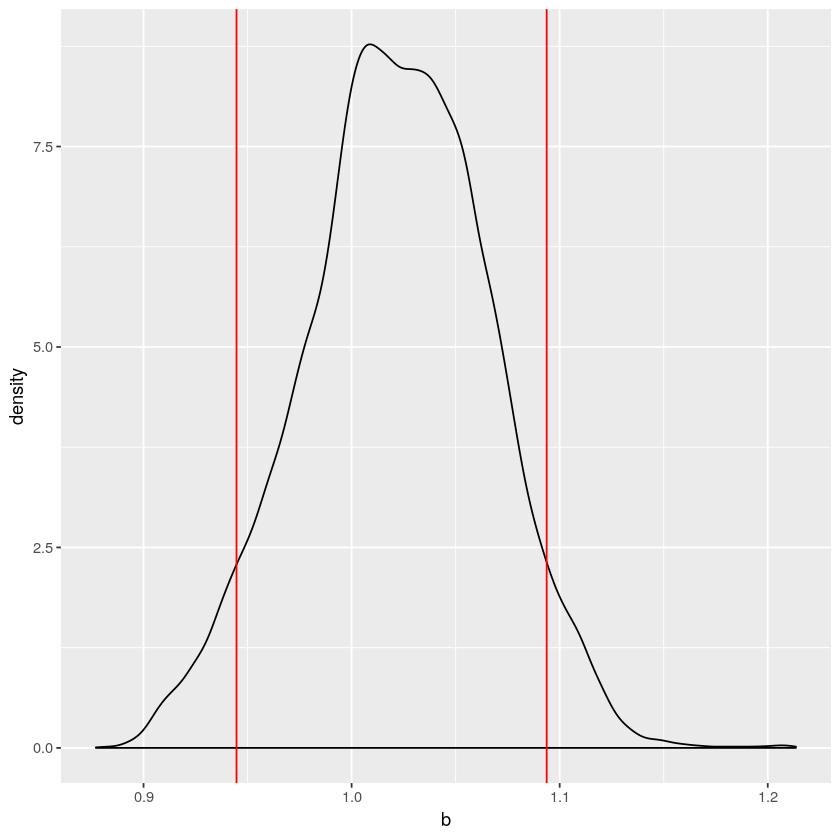

In [173]:
# Mark the 90% credible interval 
ggplot(weight_chains, aes(x = b)) + 
    geom_density() + 
    geom_vline(xintercept = ci_90, color = "red")

Addressing Markov chain instability:
- Standardize the height predictor (subtract the mean and divide by the standard deviation).
- Increase chain length.

In [175]:
weight_chains <- weight_chains  %>% 
    mutate(m_180 = a + b * 180)
head(weight_chains)

a         b        s        m_180   
1 -123.0442 1.119004 9.277851 78.37653
2 -122.4519 1.119426 9.684345 79.04477
3 -122.2645 1.117632 9.735583 78.90922
4 -122.1055 1.118164 9.712641 79.16401
5 -121.9503 1.117508 9.454566 79.20110
6 -121.4398 1.114477 9.486055 79.16611

In [176]:
quantile(weight_chains$m_180, c(0.025, 0.975))

2.5%    97.5% 
77.05594 79.30825

In [180]:
# Simulate 1 prediction under the first parameter set
rnorm(n = 1, mean = weight_chains$m_180[1], sd = weight_chains$s[1])

# Simulate 1 prediction under the second parameter set
rnorm(n = 1, mean = weight_chains$m_180[2], sd = weight_chains$s[2])

# Simulate & store 1 prediction under each parameter set
weight_chains <- weight_chains  %>% 
    mutate(Y_180 = rnorm(n = 100000, mean = weight_chains$m_180, sd = weight_chains$s))

# Print the first 6 parameter sets & predictions
head(weight_chains, 6)

[1] 86.04292

[1] 83.18908

a         b        s        m_180    Y_180   
1 -123.0442 1.119004 9.277851 78.37653 77.90746
2 -122.4519 1.119426 9.684345 79.04477 63.74546
3 -122.2645 1.117632 9.735583 78.90922 98.29157
4 -122.1055 1.118164 9.712641 79.16401 85.27173
5 -121.9503 1.117508 9.454566 79.20110 78.59171
6 -121.4398 1.114477 9.486055 79.16611 79.45703

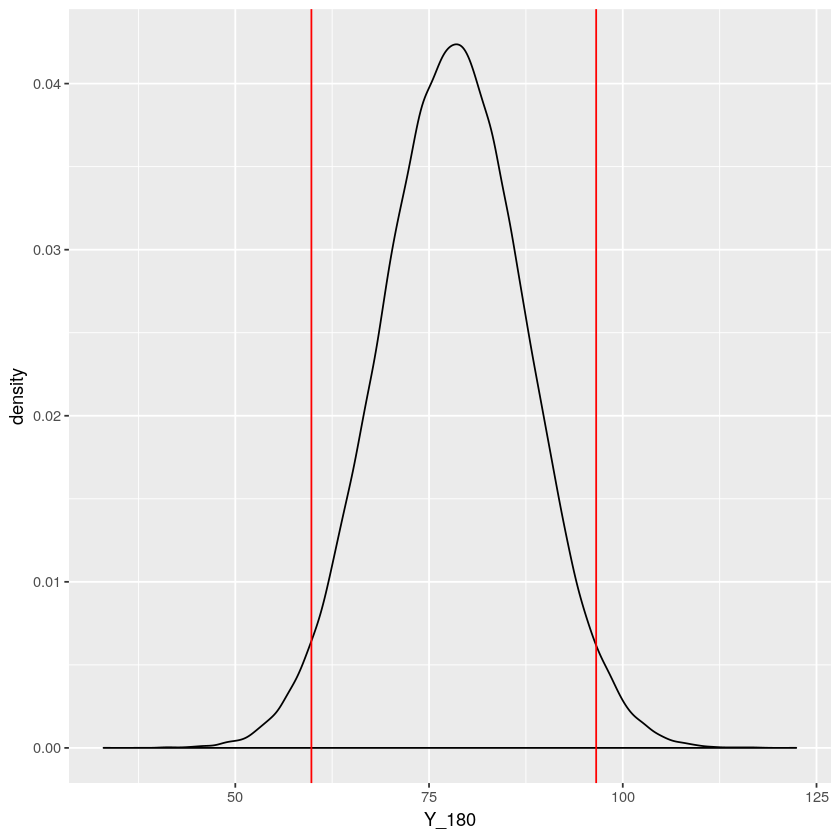

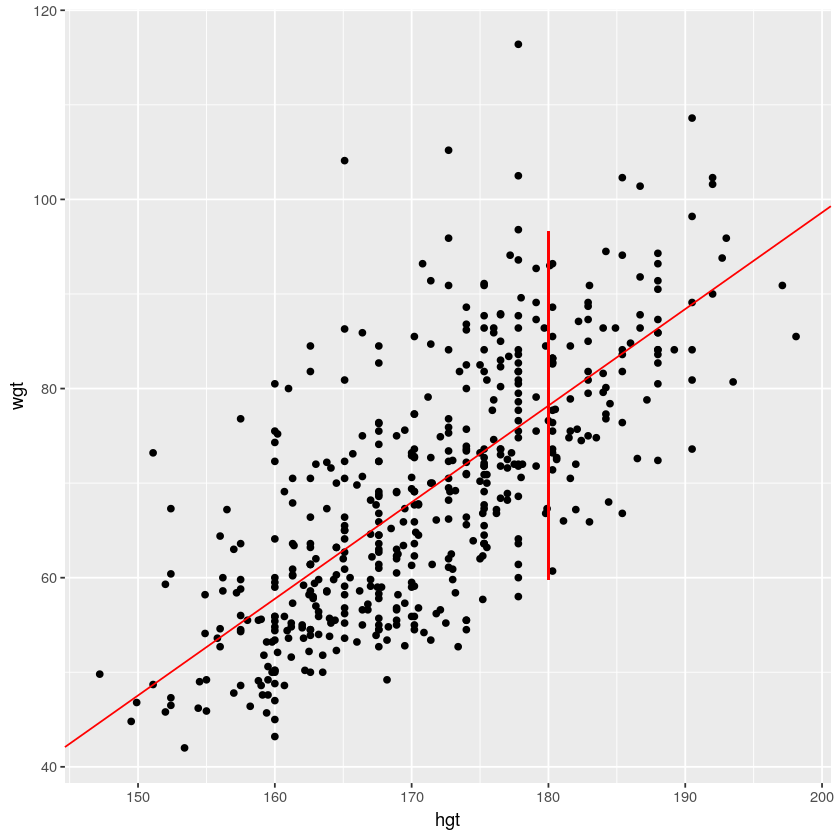

In [182]:
# Construct a posterior credible interval for the prediction
ci_180 <- quantile(weight_chains$Y_180, c(0.025, 0.975))

# Construct a density plot of the posterior predictions
ggplot(weight_chains, aes(x = Y_180)) + 
    geom_density() + 
    geom_vline(xintercept = ci_180, color = "red")

# Visualize the credible interval on a scatterplot of the data
ggplot(bdims, aes(x = hgt, y = wgt)) + 
    geom_point() + 
    geom_abline(intercept = mean(weight_chains$a), slope = mean(weight_chains$b), color = "red") + 
    geom_segment(x = 180, xend = 180, y = ci_180[1], yend = ci_180[2], color = "red")

## Categorical Predictors

In [192]:
rail_model_1 <- "model{
    # Likelihood model for Y[i]
    for(i in 1:length(Y)) {
        Y[i] ~ dnorm(m[i], s^(-2))
        m[i] <- a + b[X[i]]
    }

    # Prior models for a, b, s
    a ~ dnorm(400, 100^(-2))
    s ~ dunif(0, 200)
    b[1] <- 0
    b[2] ~ dnorm(0, 200^(-2))
}"

In [193]:
library(mosaic)
class(RailTrail$weekday)
RailTrail$weekday = as.factor(RailTrail$weekday)
head(RailTrail)

[1] "factor"

hightemp lowtemp avgtemp spring summer fall cloudcover precip volume weekday
1 83       50      66.5    0      1      0     7.6       0.00   501    TRUE   
2 73       49      61.0    0      1      0     6.3       0.29   419    TRUE   
3 74       52      63.0    1      0      0     7.5       0.32   397    TRUE   
4 95       61      78.0    0      1      0     2.6       0.00   385    FALSE  
5 44       52      48.0    1      0      0    10.0       0.14   200    TRUE   
6 69       54      61.5    1      0      0     6.6       0.02   375    TRUE   
  dayType
1 weekday
2 weekday
3 weekday
4 weekend
5 weekday
6 weekday

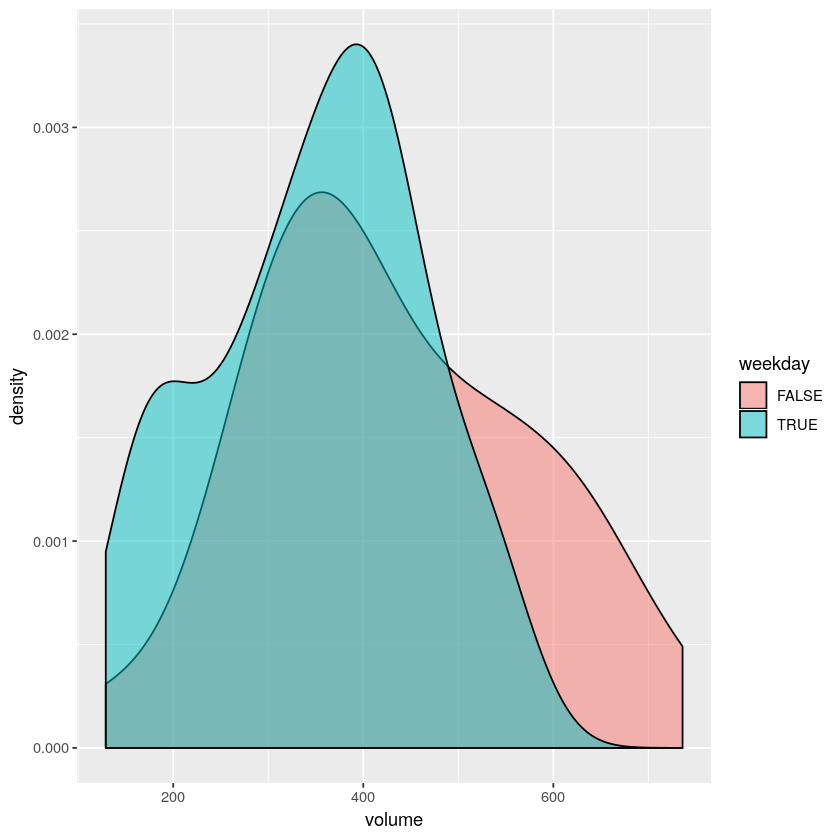

In [194]:
# Construct a density plot of volume by weekday
ggplot(RailTrail, aes(x = volume, fill = weekday)) + 
    geom_density(alpha = 0.5)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 90
   Unobserved stochastic nodes: 3
   Total graph size: 194

Initializing model



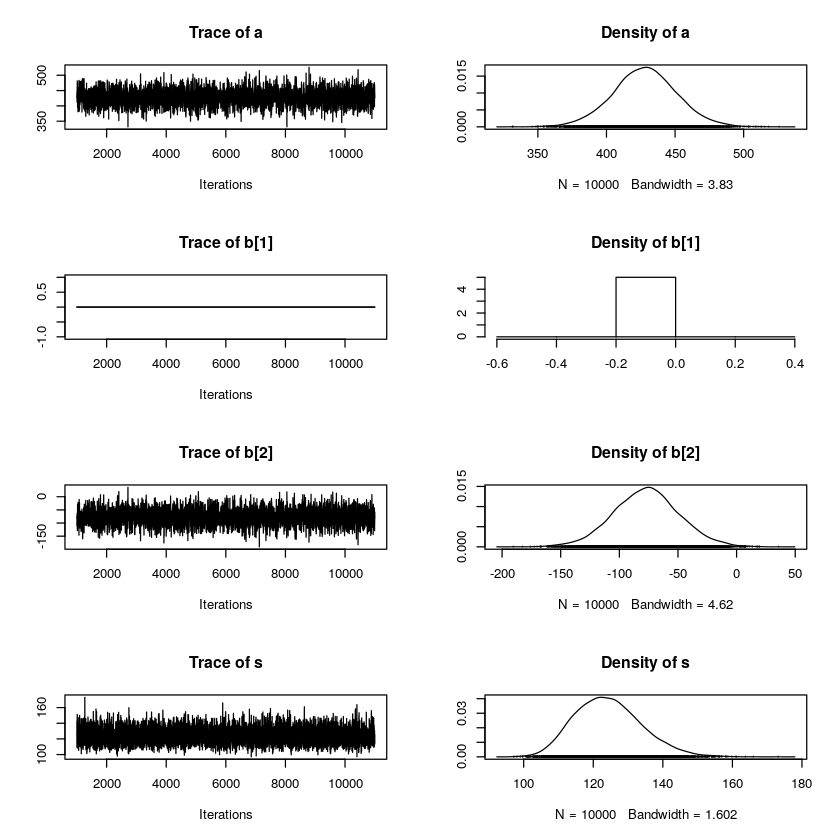

In [205]:
# COMPILE the model
rail_jags_1 <-  jags.model(
  textConnection(rail_model_1),
  data = list(X =  RailTrail$weekday,Y = RailTrail$volume),
  inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 10)
)

# SIMULATE the posterior    
rail_sim_1 <- coda.samples(model = rail_jags_1, 
                           variable.names = c("a", "b", "s"), 
                           n.iter = 10000)

# Store the chains in a data frame
rail_chains_1 <- as.data.frame(rail_sim_1[[1]][1:10000, ])

# PLOT the posterior
plot(rail_sim_1)

In [217]:
head(rail_chains_1)

a        b[1] b[2]       s       
1 439.7791 0     -82.22494 142.5293
2 427.8572 0     -77.07760 142.3707
3 445.7941 0    -110.61068 109.4817
4 438.2088 0     -77.15206 132.2621
5 425.1431 0     -86.39178 121.9734
6 426.1138 0     -87.05957 130.3991

In [216]:
# Posterior probability that typical volume is lower on weekdays
mean(rail_chains_1[3] < 0)

[1] 0.9963

2.5%    97.5% 
319.8023 381.3127

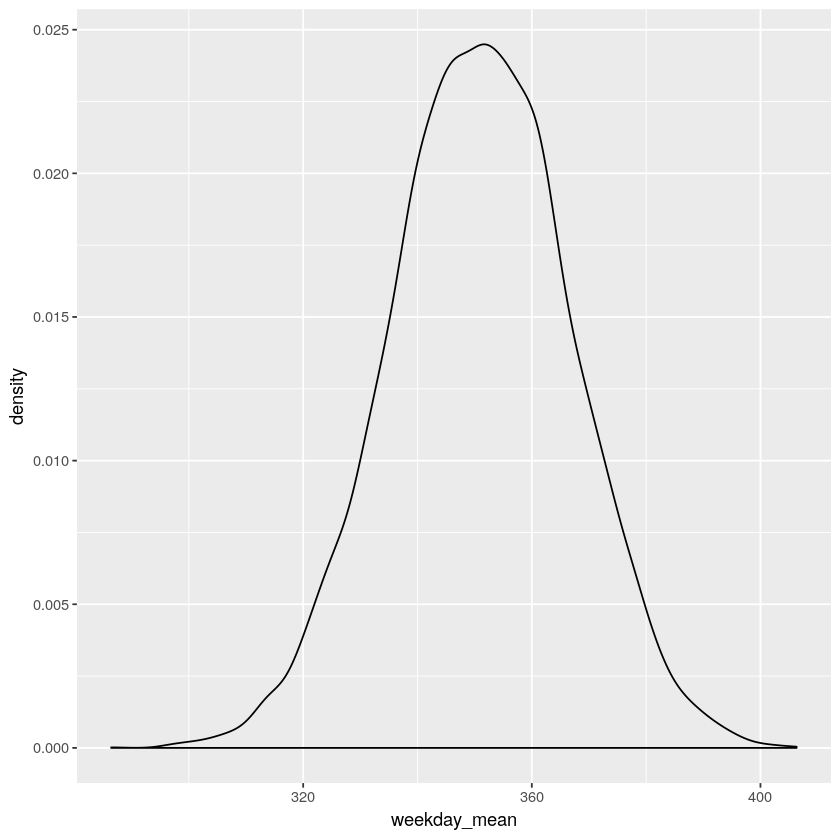

In [218]:
names(rail_chains_1)[2]<-paste("b.1.")
names(rail_chains_1)[3]<-paste("b.2.") 

# Construct a chain of values for the typical weekday volume
rail_chains_1 <- rail_chains_1 %>% 
    mutate(weekday_mean = a + b.2.)

# Construct a density plot of the weekday chain
ggplot(rail_chains_1, aes(x = weekday_mean)) + 
    geom_density()

# 95% credible interval for typical weekday volume
quantile(rail_chains_1$weekday_mean, c(0.025, 0.975) )

## Multivariate Bayesian regression

In [221]:
rail_model_2 <- "model{
  # Likelihood model for Y[i]
  for(i in 1:length(Y)) {
    Y[i] ~ dnorm(m[i], s^(-2))
    m[i] <- a + b[X[i]] + c * Z[i]
  }

  # Prior models for a, b, c, s
  a ~ dnorm(0, 200^(-2))
  b[1] <- 0
  b[2] ~ dnorm(0, 200^(-2))
  c ~ dnorm(0, 20^(-2))
  s ~ dunif(0, 200)
}"

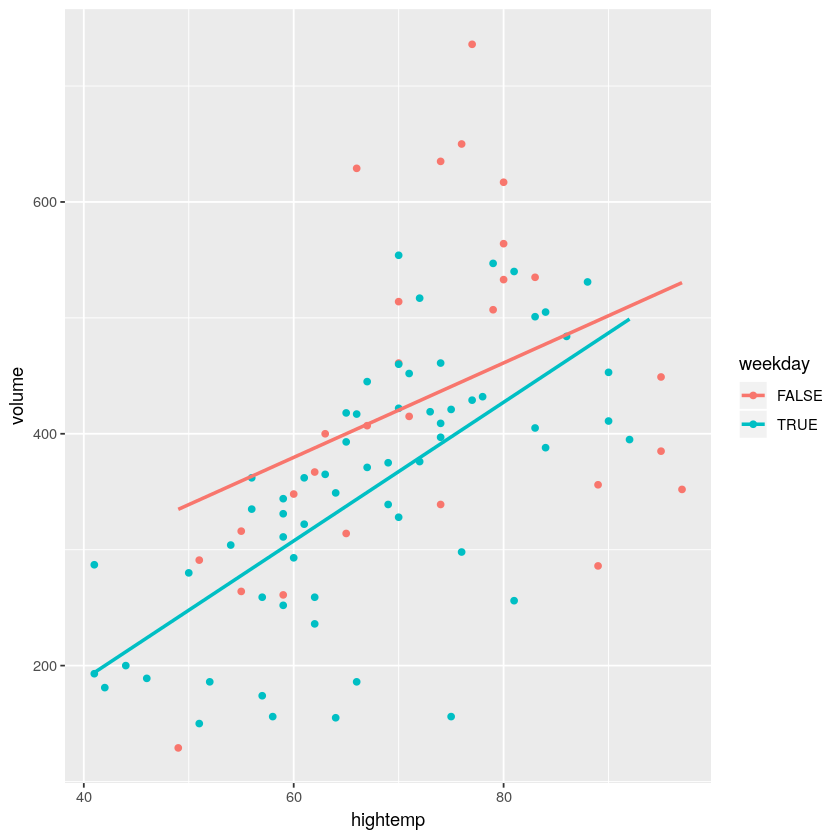

In [222]:
# Construct a plot of volume by hightemp & weekday
ggplot(RailTrail, aes(y = volume, x = hightemp, color = weekday)) + 
    geom_point() + geom_smooth(method = "lm", se = FALSE)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 90
   Unobserved stochastic nodes: 4
   Total graph size: 385

Initializing model



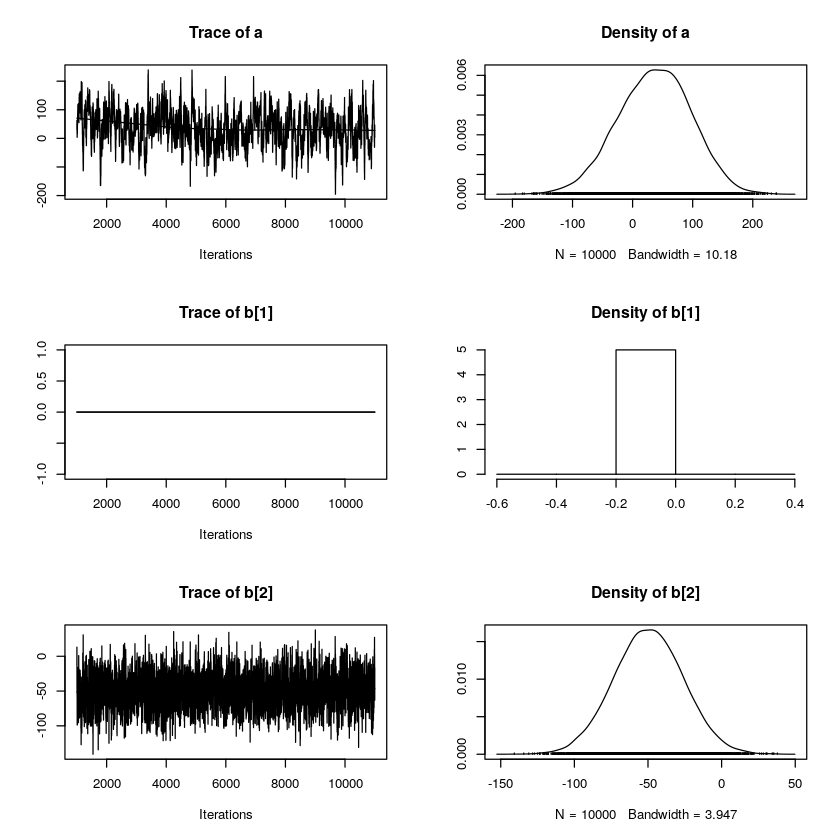

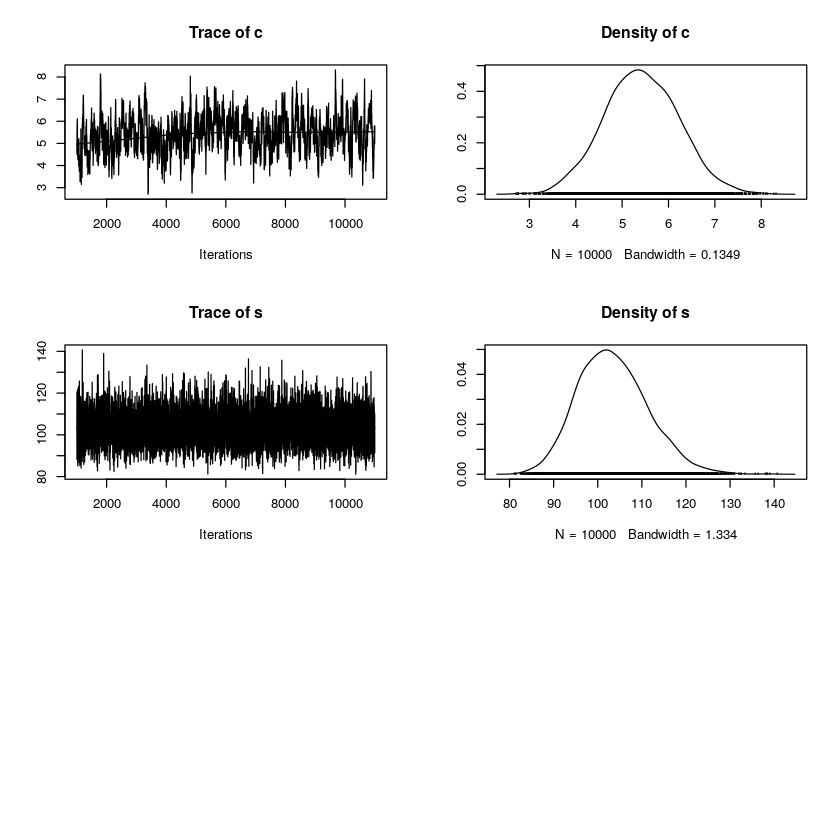

In [223]:
# COMPILE the model
rail_jags_2 <- jags.model(textConnection(rail_model_2), 
    data = list(Y = RailTrail$volume, X = RailTrail$weekday, Z = RailTrail$hightemp), 
    inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 10))

# SIMULATE the posterior    
rail_sim_2 <- coda.samples(model = rail_jags_2, variable.names =  c("a", "b", "c","s"), n.iter = 10000)

# Store the chains in a data frame
rail_chains_2 <- as.data.frame(rail_sim_2[[1]][1:10000, ])


# PLOT the posterior
plot(rail_sim_2)

In [226]:
names(rail_chains_2)[2]<-paste("b.1.")
names(rail_chains_2)[3]<-paste("b.2.") 

[1] 0.9824

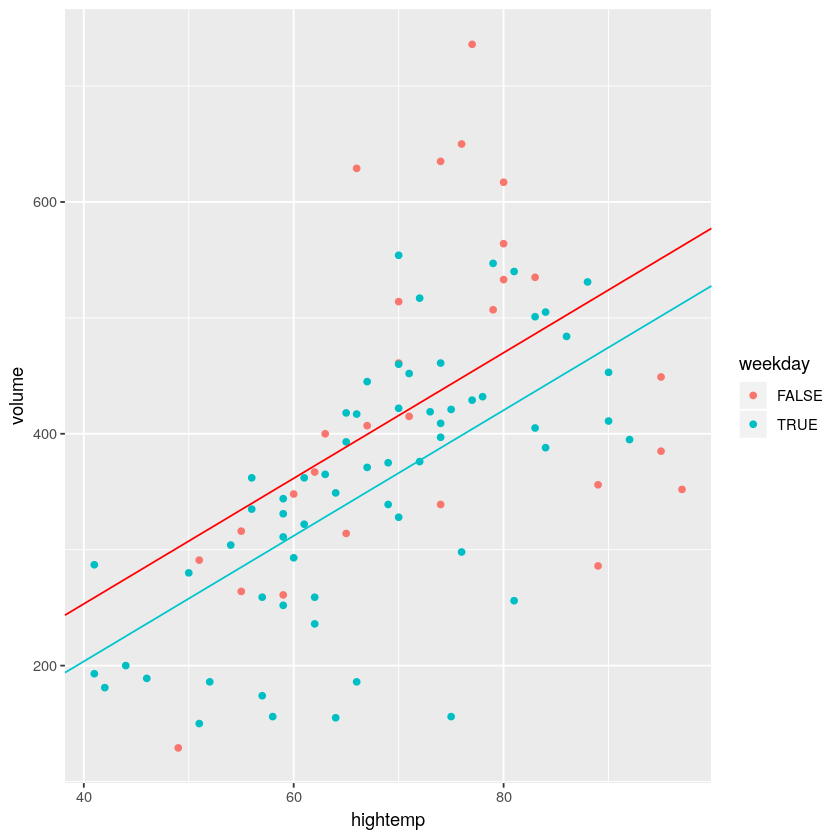

In [227]:
# Plot the posterior mean regression models
ggplot(RailTrail, aes(y = volume, x = hightemp, color = weekday)) + 
    geom_point() + 
    geom_abline(intercept = mean(rail_chains_2$a), slope = mean(rail_chains_2$c), color = "red") + 
    geom_abline(intercept = mean(rail_chains_2$a) + mean(rail_chains_2$b.2.), slope = mean(rail_chains_2$c), color = "turquoise3")
    
# Posterior probability that typical volume is lower on weekdays
mean(rail_chains_2$b.2. < 0)

## Bayesian Poisson regression

$$ Y_i \sim Pois(l_i),  where \  l_i > 0$$ 
$ l_i = a + b X_i + c Z_i $  

- A problem: linking $l_i$ directly to the linear model assumes $l_i$ can be negative
- A solution: use a log link function to link $l_i$ to the linear model:

$$l_i = e^{a + b X_i + c Z_i} $$ 

In [228]:
poisson_model <- "model{
  # Likelihood model for Y[i]
  for(i in 1:length(Y)) {
   Y[i] ~ dpois(l[i])
   log(l[i]) <- a + b[X[i]] + c*Z[i]
  }

  # Prior models for a, b, c
  a ~ dnorm(0, 200^(-2))
  b[1] <- 0
  b[2] ~ dnorm(0, 2^(-2))
  c ~ dnorm(0, 2^(-2))
}"

- Assumption: Among days with similar temperatures and weekday status, variance in $Y_i$ is equal to the mean of $Y_i$.
- Our data demonstrate potential overdispersion - the variance is larger than the mean.

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 90
   Unobserved stochastic nodes: 3
   Total graph size: 441

Initializing model



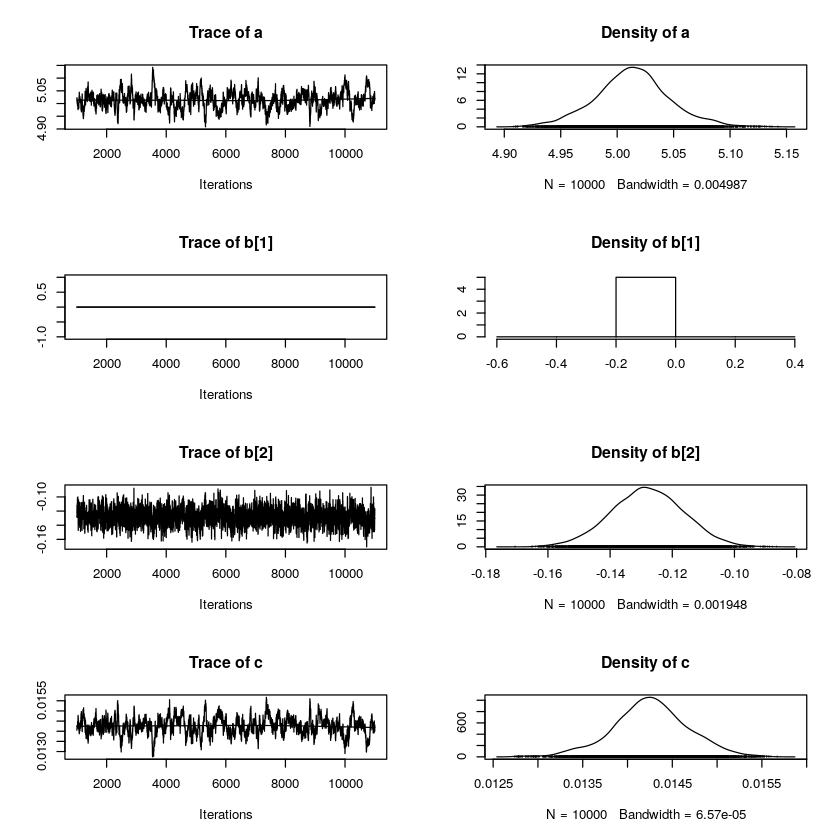

In [229]:
# COMPILE the model
poisson_jags <- jags.model(
  textConnection(poisson_model),
  data = list(Y = RailTrail$volume, X = RailTrail$weekday, Z = RailTrail$hightemp),
  inits = list(.RNG.name = "base::Wichmann-Hill", .RNG.seed = 10)
)

# SIMULATE the posterior    
poisson_sim <- coda.samples(model = poisson_jags, variable.names =  c("a", "b", "c"), n.iter = 10000)


# Store the chains in a data frame
poisson_chains <- as.data.frame(poisson_sim[[1]][1:10000, ])


# PLOT the posterior
plot(poisson_sim)

In [230]:
names(poisson_chains)[2]<-paste("b.1.")
names(poisson_chains)[3]<-paste("b.2.") 

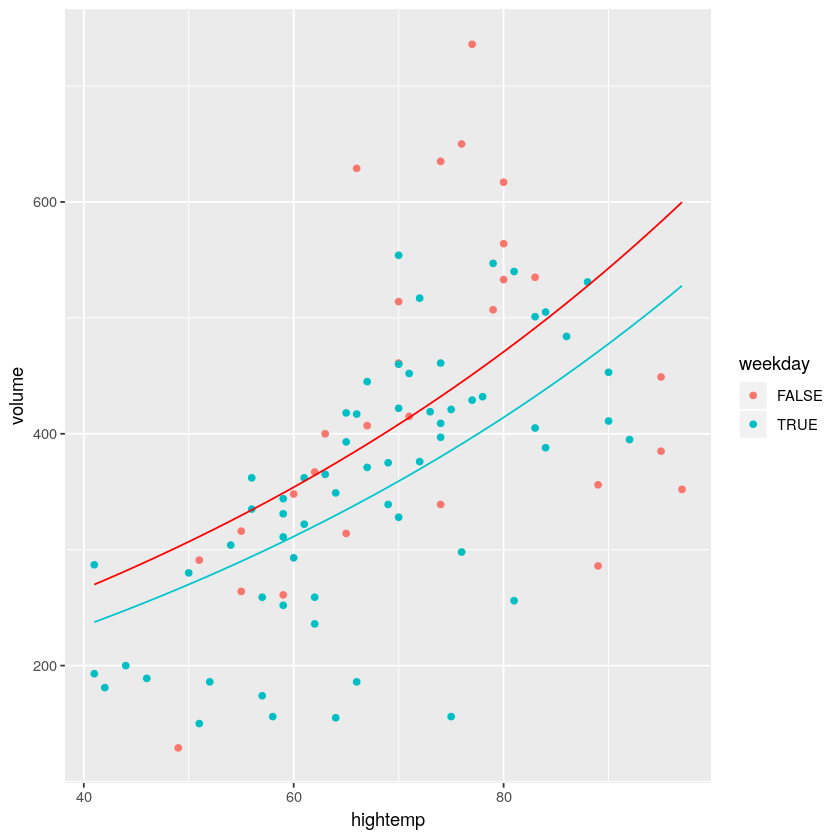

In [231]:
# Plot the posterior mean regression models
ggplot(RailTrail, aes(x = hightemp, y = volume, color = weekday)) + 
    geom_point() + 
    stat_function(fun = function(x){exp(mean(poisson_chains$a) + mean(poisson_chains$c) * x)}, color = "red") + 
    stat_function(fun = function(x){exp(mean(poisson_chains$a) + mean(poisson_chains$b.2.) + mean(poisson_chains$c) * x)}, color = "turquoise3")

In [232]:
# Calculate the typical volume on 80 degree weekends & 80 degree weekdays
poisson_chains <- poisson_chains %>% 
    mutate(l_weekend = exp(poisson_chains$a + poisson_chains$c * 80)) %>% 
    mutate(l_weekday = exp(poisson_chains$a + poisson_chains$b.2. + poisson_chains$c * 80))

# Construct a 95% CI for typical volume on 80 degree weekend
quantile(poisson_chains$l_weekend, c(0.025, 0.975))

# Construct a 95% CI for typical volume on 80 degree weekday
quantile(poisson_chains$l_weekday, c(0.025, 0.975))


2.5%    97.5% 
462.1431 479.3101

2.5%    97.5% 
407.4644 420.7102

[1] 0.24

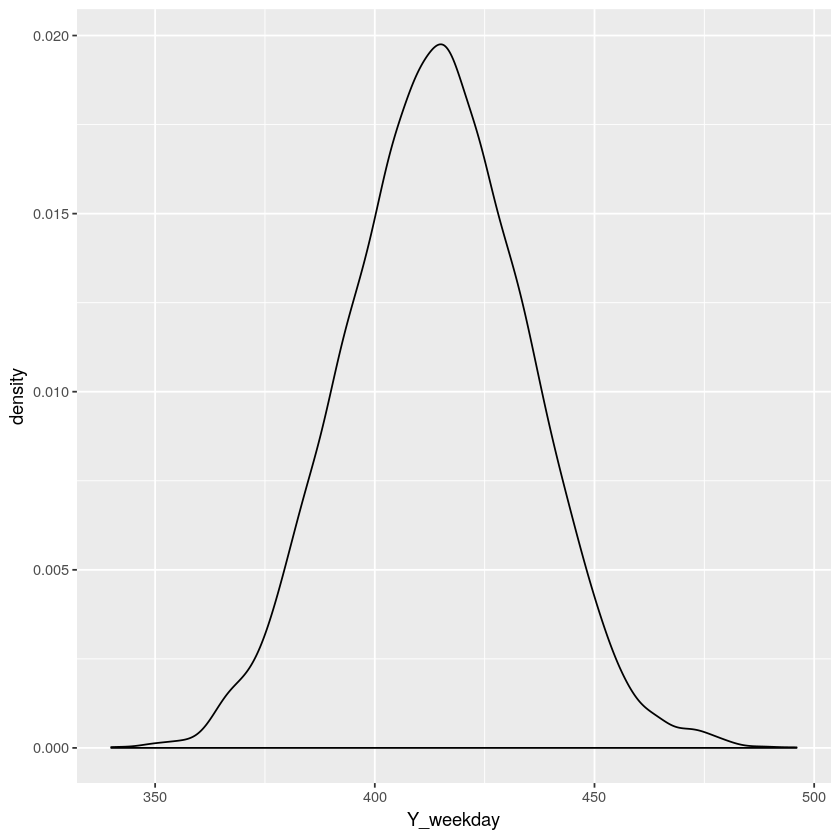

In [233]:
# Simulate weekend & weekday predictions under each parameter set
poisson_chains <- poisson_chains %>% 
    mutate(Y_weekend = rpois(n = 10000, lambda = l_weekend)) %>% 
    mutate(Y_weekday = rpois(n = 10000, lambda = l_weekday))
    
# Construct a density plot of the posterior weekday predictions
ggplot(poisson_chains, aes(x = Y_weekday)) + geom_density()

    
# Posterior probability that weekday volume is less 400
mean(poisson_chains$Y_weekday < 400)